<a href="https://www.hackerearth.com/"><img src="https://he-s3.s3.amazonaws.com/media/cache/b3/93/b393eda1fb65e5147a2a5f22d1216d3e.png"></img></a><br>
<strong><em><center>HackerEarth Machine Learning challenge: Will your employees leave you? </em></strong><p><center><a href="https://www.hackerearth.com/">HackerEarth</a>

### Table of Contents

* [1. Project](#project)
* [2. Libraries](#library)
* [3. Data Collection](#collection)
* [4. Data Preparation](#preparation)
    * [1.0 Miscellaneous](#miscellaneous)
    * [1.1 Remove Columns/Rows](#removing)
    * [1.2 Missing Values](#missing)
    * [1.3 Transforming Columns](#transforming) 
    * [1.4 Imputation](#imputation)
        * [1.4.1 Deletion](#section_1_2_1)
        * [1.4.2 Imputation](#section_1_2_2)
* [5. Exploratory Data Analysis](#exploration)
    * [5.1 Univariate Analysis](#univariate)
    * [5.2 Bi-Variate Analysis](#bivariate)
    * [5.3 Multivariate Analysis](#multivariate)    
* [6. Feature Engineering](#engineering)
    * [6.1 General Transformation](#general_trans)
    * [6.2 Encoding](#encoding)
    * [6.3 Remove Columns](#remove_columns)  
* [7. Using Amazon SageMaker](#sagemaker)
    * [7.1 Formatting dataset](#formatting_aws)
    * [7.2 Modeling and Training on AWS](#modeling_aws)
    * [7.3 Hyperparameter tuning jobs on AWS](#modeling_hyper)

<div class="alert alert-block alert-info">
<b><h1>1. Project</h1></div>
<a class="anchor" id="project"></a>

# Predict the employee attrition rate in organizations

<img src="employee-turnover.png" width="100%" height="60"/>

### <strong>Problem Statement</strong> 

Employees are the most important part of an organization. Successful employees meet deadlines, make sales, and build the brand through positive customer interactions.

Employee attrition is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, your task is to predict the attrition rate of employees of an organization.   

<div class="alert alert-block alert-info">
<b><h1>2. Libraries</h1></div>
<a class="anchor" id="library"></a>

<strong>Import the usual libraries for pandas and plotting</strong>

In [144]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from IPython.display import Markdown, display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import json

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b><h1>3. Data Collection</h1></div>
<a class="anchor" id="collection"></a>

<strong>Use pandas to read train.csv as a dataframe called impressions.</strong>

In [145]:
train_original = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')

<strong>Check out the info(), head(), and describe() methods on impressions.<strong>

In [146]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [147]:
test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        2839 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            2948 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  2997 non-null   float

In [148]:
train_original.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [149]:
test_original.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [150]:
train_original.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [151]:
test_original.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
count,2839.000000,3000.000000,2948.000000,3000.000000,3000.000000,3000.000000,3000.000000,2997.000000,2995.000000,3000.000000,2783.000000,3000.000000,2702.000000,3000.000000,3000.000000,3000.000000
mean,39.797816,3.226333,13.403664,2.405333,46.878000,0.827333,2.794667,6.060727,2.380968,3.067000,0.027530,0.012328,1.907476,2.836333,7.130333,3.232333
std,13.501754,1.065904,10.189245,1.150426,16.051947,0.642643,1.188125,2.096866,1.142826,0.821017,0.999799,0.999734,0.544526,0.940837,1.152876,0.903305
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000
50%,38.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000
75%,52.000000,4.000000,21.000000,3.000000,60.000000,1.000000,4.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000


<div class="alert alert-block alert-info">
<b><h1>4. Data Preparation</h1></div>
<a class="anchor" id="preparation"></a>

<strong>Let's assign original dataframes to new ones.</strong>

In [152]:
train = train_original
test = test_original

<div class="alert alert-block alert-warning">
<b>4.0 Miscellaneous</b>
</div><a class="anchor" id="miscellaneous"></a>

<strong>Renaming column labels when they contain blank spaces or any special character, to make them more manageable </strong>

In [153]:
def rename_column_labels(df, old_str = " ", new_str = "_"):
    #Use case: from "column number 1" to "column_number_1"
    display(Markdown('**Results:**' ))
    cols = df.loc[:,df.columns.str.contains(old_str)].shape[1]
    if cols > 0:
        print("Features changed => {0}".format(cols))
        display(df.loc[:,df.columns.str.contains(old_str)].columns.values)
        df.columns = [label.replace(old_str, new_str ) for label in df.columns]
    else:
        print("No changes were applied")
    return df

In [154]:
train = rename_column_labels(train," ","_")
train = rename_column_labels(train,"-","_")
train = rename_column_labels(train,":","_")

**Results:**

No changes were applied


**Results:**

No changes were applied


**Results:**

No changes were applied


In [155]:
test = rename_column_labels(test," ","_")
test = rename_column_labels(test,"-","_")
test = rename_column_labels(test,":","_")

**Results:**

No changes were applied


**Results:**

No changes were applied


**Results:**

No changes were applied


<div class="alert alert-block alert-warning">
<b>4.1 Remove Columns/Rows</b>
</div><a class="anchor" id="removing"></a>

<strong>Let's do a quick review of list of values per each column.</strong>

In [156]:
def list_column_values(df, number_of_values, print_all):
    display(Markdown('**Results:**' ))
    for col in df.columns[0:]:
        if df[col].nunique() <= number_of_values:
            print(f"{col.ljust(25)}" +  ' ==> ' + str(df[col].sort_values().unique().tolist()) )
        else:  
            if print_all=='True':
               print(f"{col.ljust(25)}" + ' ==> more than ' + str(number_of_values) + ' values')

In [157]:
list_column_values(train,15,'False')

**Results:**

Gender                    ==> ['F', 'M']
Education_Level           ==> [1, 2, 3, 4, 5]
Relationship_Status       ==> ['Married', 'Single']
Hometown                  ==> ['Clinton', 'Franklin', 'Lebanon', 'Springfield', 'Washington']
Unit                      ==> ['Accounting and Finance', 'Human Resource Management', 'IT', 'Logistics', 'Marketing', 'Operarions', 'Production', 'Purchasing', 'Quality', 'R&D', 'Sales', 'Security']
Decision_skill_possess    ==> ['Analytical', 'Behavioral', 'Conceptual', 'Directive']
Time_since_promotion      ==> [0, 1, 2, 3, 4]
Travel_Rate               ==> [0, 1, 2]
Post_Level                ==> [1, 2, 3, 4, 5]
Pay_Scale                 ==> [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, nan]
Compensation_and_Benefits ==> ['type0', 'type1', 'type2', 'type3', 'type4']
Work_Life_balance         ==> [1.0, 2.0, 3.0, 4.0, 5.0, nan]
VAR1                      ==> [1, 2, 3, 4, 5]
VAR2                      ==> [-1.8176, -0.9612, -0.1048, 0.7516, 1.6081, nan]
V

In [158]:
list_column_values(test,15,'False')

**Results:**

Gender                    ==> ['F', 'M']
Education_Level           ==> [1, 2, 3, 4, 5]
Relationship_Status       ==> ['Married', 'Single']
Hometown                  ==> ['Clinton', 'Franklin', 'Lebanon', 'Springfield', 'Washington']
Unit                      ==> ['Accounting and Finance', 'Human Resource Management', 'IT', 'Logistics', 'Marketing', 'Operarions', 'Production', 'Purchasing', 'Quality', 'R&D', 'Sales', 'Security']
Decision_skill_possess    ==> ['Analytical', 'Behavioral', 'Conceptual', 'Directive']
Time_since_promotion      ==> [0, 1, 2, 3, 4]
Travel_Rate               ==> [0, 1, 2]
Post_Level                ==> [1, 2, 3, 4, 5]
Pay_Scale                 ==> [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, nan]
Compensation_and_Benefits ==> ['type0', 'type1', 'type2', 'type3', 'type4']
Work_Life_balance         ==> [1.0, 2.0, 3.0, 4.0, 5.0, nan]
VAR1                      ==> [1, 2, 3, 4, 5]
VAR2                      ==> [-1.8176, -0.9612, -0.1048, 0.7516, 1.6081, nan]
V

In [159]:
def list_column_values_percentage(df, number_of_values):
    display(Markdown('**Results:**' ))
    print('Columns with less than ' + str(number_of_values) + ' values')
    for col in df.columns[0:]:
        if train[col].nunique() <= number_of_values:
            print(df[col].value_counts()/len(train)) 

In [160]:
list_column_values_percentage(train, 15)

**Results:**

Columns with less than 15 values
F    0.587714
M    0.412286
Name: Gender, dtype: float64
3    0.411143
4    0.296571
1    0.099286
2    0.098714
5    0.094286
Name: Education_Level, dtype: float64
Married    0.645714
Single     0.354286
Name: Relationship_Status, dtype: float64
Lebanon        0.295714
Springfield    0.248000
Franklin       0.217571
Washington     0.158000
Clinton        0.080714
Name: Hometown, dtype: float64
IT                           0.199143
Logistics                    0.167571
Sales                        0.134714
Operarions                   0.100857
R&D                          0.097143
Purchasing                   0.072000
Accounting and Finance       0.070857
Human Resource Management    0.049143
Marketing                    0.030286
Production                   0.030143
Quality                      0.027571
Security                     0.020571
Name: Unit, dtype: float64
Conceptual    0.250857
Analytical    0.250714
Directive     0.250429
Behavioral    0.2

<strong>Let's remove unuseful columns such as ID's.</strong>

In [161]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [162]:
def remove_column_values(df, columns_to_remove):
    display(Markdown('**Results:**'))
    print("Original number of features => {}".format(df.shape[1]))
    i=0
    for col in columns_to_remove:
        if col in df.columns:
            i+=1
            df = df.drop(col, axis=1)
            print("Column: {} was removed".format(col))
        else:
            print("Column: {} does not exist".format(col))
    if i==0:
        print('No features were removed')
    else:    
        print("Number of features has been reduced to => {}".format(df.shape[1]))
    return df

In [163]:
train = remove_column_values(train,['Employee_ID'])

**Results:**

Original number of features => 24
Column: Employee_ID was removed
Number of features has been reduced to => 23


In [164]:
test = remove_column_values(test,['Employee_ID'])

**Results:**

Original number of features => 23
Column: Employee_ID was removed
Number of features has been reduced to => 22


<div class="alert alert-block alert-warning">
<b>4.2 Missing Values</b>
</div> <a class="anchor" id="missing"></a>

<strong>Let's use firstly a standard function, then a customized one, and finally a visual representation.</strong>

In [165]:
train.isnull().sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [166]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        display(Markdown('**Results:**'))
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There is/are " + str(mis_val_table_ren_columns.shape[0]) +
              " column(s) that have missing values.")

        return mis_val_table_ren_columns

In [167]:
missing_values_table(train)

**Results:**

Your selected dataframe has 23 columns.
There is/are 6 column(s) that have missing values.


,Missing Values,% of Total Values
VAR4,656,9.4
VAR2,577,8.2
Age,412,5.9
Time_of_service,144,2.1
Work_Life_balance,11,0.2
Pay_Scale,9,0.1


In [168]:
missing_values_table(test)

**Results:**

Your selected dataframe has 22 columns.
There is/are 6 column(s) that have missing values.


,Missing Values,% of Total Values
VAR4,298,9.9
VAR2,217,7.2
Age,161,5.4
Time_of_service,52,1.7
Work_Life_balance,5,0.2
Pay_Scale,3,0.1


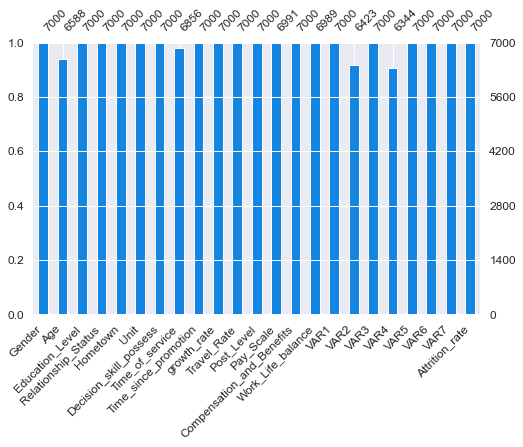

In [169]:
msno.bar(train, color = '#1585E2',fontsize=12,figsize = (8, 5))

<strong>Let's remove selected columns/rows with too many missing values if applies.</strong>

In [170]:
train = remove_column_values(train, ['x'])

**Results:**

Original number of features => 23
Column: x does not exist
No features were removed


In [171]:
test = remove_column_values(test, ['x'])

**Results:**

Original number of features => 22
Column: x does not exist
No features were removed


<div class="alert alert-block alert-warning">
<b>4.3 Imputation</b>
</div> <a class="anchor" id="imputation"></a>

In [172]:
#create a set with input columns that are correlated 

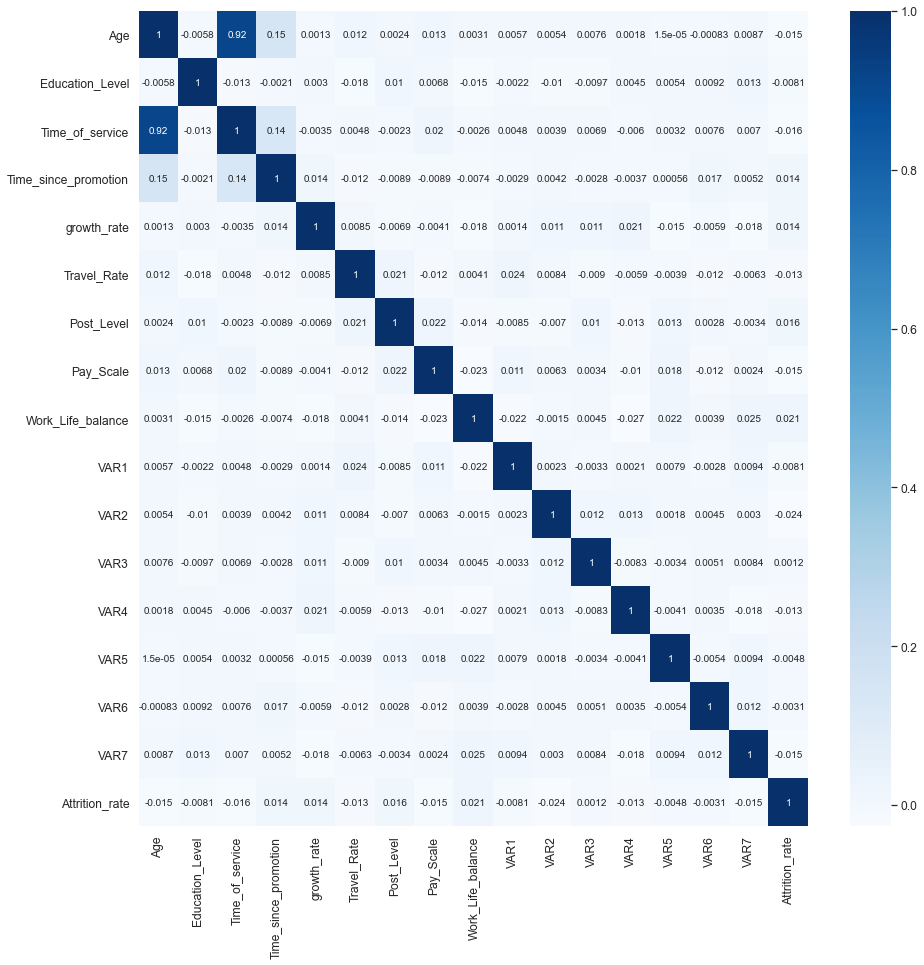

In [173]:
plt.subplots(figsize=(15,15))
data = train.corr()
sns.heatmap(data, cmap ='Blues', annot=True, annot_kws={"size": 10})

In [174]:
df_corr_columns

NameError: name 'df_corr_columns' is not defined

In [ ]:
def regressor_inputer(df, output_column, input_column, decimals=2):
    
    display(Markdown('**Results:**'))
    #Missing values from Output column
    missing_output = df[output_column].isnull()
    print("Number of missing values in column: {} => {}".format(output_column,missing_output.sum() ))
    
    df_regressor = df.dropna(axis=0, subset = [output_column,input_column])
    df_regressor = df_regressor.loc[:,[output_column,input_column]]
    #Input column observations with Output column missing
    input_column_with_missing_output_column = pd.DataFrame(df[input_column][missing_output])
    input_column_with_missing_output_column = input_column_with_missing_output_column.dropna()
    #Creating regressor model
    x = df_regressor[[input_column]]
    y = df_regressor[[output_column]]
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    lm = LinearRegression().fit(x_train,y_train)
    print(f'R2 value in validation partition: {lm.score(x_val, y_val)}')
    #Predicting output column
    predictor = df[input_column][ df[output_column].isnull()  &  ~df[input_column].isnull() ] 
    predictor = pd.DataFrame(predictor)
    predictor[output_column]=  lm.predict( predictor[[input_column]] ) 
    df.loc[ df[output_column].isnull()  &  ~df[input_column].isnull() ,[output_column]] = predictor[output_column].round(decimals)
    print("New number of missing values in column: {} => {}".format(output_column, df[output_column].isnull().sum() ))
    return df

In [ ]:
train = regressor_inputer(train,'Age','Time_of_service',0)
train = regressor_inputer(train,'Time_of_service','Age',0)

In [ ]:
train['Age'].isnull().sum()

In [ ]:
test = regressor_inputer(test,'Age','Time_of_service',0)
test = regressor_inputer(test,'Time_of_service','Age',0)

In [ ]:
for i in train['Time_of_service']:
    print(i,end=' ')

<strong>Let's use mean technique to impute missing values for column(s) identified in previous step.</strong>

In [175]:
mean_imputer = SimpleImputer(strategy='mean')
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

train["VAR4"] = median_imputer.fit_transform(train[["VAR4"]])
train["VAR2"] = median_imputer.fit_transform(train[["VAR2"]])

train["Age"] = mean_imputer.fit_transform(train[["Age"]])

train["Time_of_service"] = mean_imputer.fit_transform(train[["Time_of_service"]])

train["Work_Life_balance"] = most_frequent_imputer.fit_transform(train[["Work_Life_balance"]])
train["Pay_Scale"] = most_frequent_imputer.fit_transform(train[["Pay_Scale"]])


     #   dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)
      #  dataset['Time_of_service'].fillna(dataset['Time_of_service'].mean(), inplace = True)
     #   dataset['Pay_Scale'].fillna(dataset['Pay_Scale'].mode()[0], inplace = True)
    #    dataset['Work_Life_balance'].fillna(dataset['Work_Life_balance'].mode()[0], inplace = True)
     #   dataset['VAR2'].fillna(dataset['VAR2'].median(), inplace = True)
    #    dataset['VAR4'].fillna(dataset['VAR4'].median(), inplace = True)
    #    assert(dataset.isnull().sum().sum()==0)

<strong>Now, let's check the missingness of the dataset.</strong>

In [176]:
missing_values_table(train)

**Results:**

Your selected dataframe has 23 columns.
There is/are 0 column(s) that have missing values.


,Missing Values,% of Total Values


In [177]:
mean_imputer = SimpleImputer(strategy='mean')
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')


test["VAR4"] = median_imputer.fit_transform(test[["VAR4"]])
test["VAR2"] = median_imputer.fit_transform(test[["VAR2"]])

test["Age"] = mean_imputer.fit_transform(test[["Age"]])

test["Time_of_service"] = mean_imputer.fit_transform(test[["Time_of_service"]])
test["Work_Life_balance"] = most_frequent_imputer.fit_transform(test[["Work_Life_balance"]])
test["Pay_Scale"] = most_frequent_imputer.fit_transform(test[["Pay_Scale"]])

In [178]:
missing_values_table(test)

**Results:**

Your selected dataframe has 22 columns.
There is/are 0 column(s) that have missing values.


,Missing Values,% of Total Values


<div class="alert alert-block alert-warning">
<b>4.4 Transforming Columns</b>
</div> <a class="anchor" id="transforming"></a>

<strong>Let's review if there are object columns.</strong>

In [179]:
print("Column data types and their frequency\n{}".format(train.dtypes.value_counts()))

Column data types and their frequency
int64      9
float64    8
object     6
dtype: int64


<strong>Let's see if some of these columns are numeric.</strong>

In [180]:
def check_object_columns(df):
    display(Markdown('**Results:**'))
    object_columns_df = df.select_dtypes(include=['object'])
    print(object_columns_df.iloc[0])
    i=0
    for col in object_columns_df:
        if is_numeric_dtype(df[col]):
            i+=1
            print(f"{col.ljust(25)}" + ' ==> is Numeric')
    if i==0:
        print('No numeric columns were found')
    else:    
        print("Number of numeric columns found => {}".format(i))

In [181]:
check_object_columns(train)

**Results:**

Gender                                F
Relationship_Status             Married
Hometown                       Franklin
Unit                                 IT
Decision_skill_possess       Conceptual
Compensation_and_Benefits         type2
Name: 0, dtype: object
No numeric columns were found


<strong>Let's convert columns to numeric if any.</strong>

In [182]:
def columns_to_numeric(df,columns_to_convert = []):
    display(Markdown('**Results:**'))
    i=0
    for col in columns_to_convert:
        if col in df.columns:
            if is_numeric_dtype(df[col]):
                i+=1
                df[col] = df[col].str.rstrip('%').astype('float')
                print("Column {} was converted".format(col))
            else:
                print("Column {} could not be converted".format(col))
        else:
            print("Column {} does not exist".format(col))
    if i==0:
        print('No columns were converted')          
    return df

In [183]:
train = columns_to_numeric(train,['x','y'])

**Results:**

Column x does not exist
Column y does not exist
No columns were converted


<strong>Let's convert object columns to strings.</strong>

In [184]:
def object_to_str(df, to_str_cols):
    display(Markdown('**Results:**'))
    i=0    
    for col in to_str_cols:
        if col in df.columns:
            i+=1
            df[col] = df[col].astype(str)
            print("Column {} was converted".format(col))
        else:
            print("Column {} does not exist".format(col))    
    if i==0:
        print('No columns were converted')          
    return df

In [185]:
to_str_cols = ['Gender','Relationship_Status','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits']
train = object_to_str(train, to_str_cols)

**Results:**

Column Gender was converted
Column Relationship_Status was converted
Column Hometown was converted
Column Unit was converted
Column Decision_skill_possess was converted
Column Compensation_and_Benefits was converted


In [186]:
test = object_to_str(test, to_str_cols)

**Results:**

Column Gender was converted
Column Relationship_Status was converted
Column Hometown was converted
Column Unit was converted
Column Decision_skill_possess was converted
Column Compensation_and_Benefits was converted


<div class="alert alert-block alert-info">
<b><h1>5. Exploratory Data Analysis</h1></div>
<a class="anchor" id="exploration"></a>

<strong>Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities.</strong>

<code style="background:yellow;color:black">Target column is assigned to <strong>l_target</strong> variable to make the visualization code more dynamic.</code>

In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     7000 non-null   object 
 1   Age                        7000 non-null   float64
 2   Education_Level            7000 non-null   int64  
 3   Relationship_Status        7000 non-null   object 
 4   Hometown                   7000 non-null   object 
 5   Unit                       7000 non-null   object 
 6   Decision_skill_possess     7000 non-null   object 
 7   Time_of_service            7000 non-null   float64
 8   Time_since_promotion       7000 non-null   int64  
 9   growth_rate                7000 non-null   int64  
 10  Travel_Rate                7000 non-null   int64  
 11  Post_Level                 7000 non-null   int64  
 12  Pay_Scale                  7000 non-null   float64
 13  Compensation_and_Benefits  7000 non-null   objec

In [188]:
#train['Attrition_rate'] = np.where(train['Attrition_rate'] > 0.5,1,0)

In [189]:
 is_numeric_dtype(train['Attrition_rate'])

True

In [190]:
train['Attrition_rate']

0       0.1841
1       0.0670
2       0.0851
3       0.0668
4       0.1827
         ...  
6995    0.7839
6996    0.1055
6997    0.7847
6998    0.4162
6999    0.0910
Name: Attrition_rate, Length: 7000, dtype: float64

In [191]:
l_target = 'Attrition_rate'

<div class="alert alert-block alert-warning">
<b>5.1 Univariate Analysis</b>
</div> <a class="anchor" id="univariate"></a>

<strong>Let's quick review target column values/distribution.</strong>

In [192]:
list_column_values_percentage(train,15)

**Results:**

Columns with less than 15 values
F    0.587714
M    0.412286
Name: Gender, dtype: float64
3    0.411143
4    0.296571
1    0.099286
2    0.098714
5    0.094286
Name: Education_Level, dtype: float64
Married    0.645714
Single     0.354286
Name: Relationship_Status, dtype: float64
Lebanon        0.295714
Springfield    0.248000
Franklin       0.217571
Washington     0.158000
Clinton        0.080714
Name: Hometown, dtype: float64
IT                           0.199143
Logistics                    0.167571
Sales                        0.134714
Operarions                   0.100857
R&D                          0.097143
Purchasing                   0.072000
Accounting and Finance       0.070857
Human Resource Management    0.049143
Marketing                    0.030286
Production                   0.030143
Quality                      0.027571
Security                     0.020571
Name: Unit, dtype: float64
Conceptual    0.250857
Analytical    0.250714
Directive     0.250429
Behavioral    0.2

In [193]:
def plot_target_column (df, target):
    ax = sns.countplot(x=target, data=df)
    plt.title('Distribution of ' + target + ' column')
    plt.xlabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
    total = len(df[target])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
            ax.text(p.get_x()+p.get_width()/2., p.get_height() + 0.2, p.get_height(),ha="center")
    plt.show()

In [194]:
#plot_target_column(train, l_target)

<strong>Let's do again a quick review of list of values per each column.</strong>

In [195]:
list_column_values(train,15,'True')

**Results:**

Gender                    ==> ['F', 'M']
Age                       ==> more than 15 values
Education_Level           ==> [1, 2, 3, 4, 5]
Relationship_Status       ==> ['Married', 'Single']
Hometown                  ==> ['Clinton', 'Franklin', 'Lebanon', 'Springfield', 'Washington']
Unit                      ==> ['Accounting and Finance', 'Human Resource Management', 'IT', 'Logistics', 'Marketing', 'Operarions', 'Production', 'Purchasing', 'Quality', 'R&D', 'Sales', 'Security']
Decision_skill_possess    ==> ['Analytical', 'Behavioral', 'Conceptual', 'Directive']
Time_of_service           ==> more than 15 values
Time_since_promotion      ==> [0, 1, 2, 3, 4]
growth_rate               ==> more than 15 values
Travel_Rate               ==> [0, 1, 2]
Post_Level                ==> [1, 2, 3, 4, 5]
Pay_Scale                 ==> [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Compensation_and_Benefits ==> ['type0', 'type1', 'type2', 'type3', 'type4']
Work_Life_balance         ==> [1.0, 2.0, 3

<strong>Let's plot categorical columns.</strong>

In [196]:
def plot_categorical_columns(df):
    categorical = train.select_dtypes(exclude=['int', 'float','int32','float32','int64','float64']).columns
    lcols_in_plot = 2
    lrows_in_plot = math.ceil(len(categorical)/lcols_in_plot)   
    fig, ax = plt.subplots( lrows_in_plot, lcols_in_plot , figsize=(20, 30))
    plt.subplots_adjust(wspace=0.2, hspace=0.4) 
    sns.set(font_scale = 1.1)
    for variable, subplot in zip(categorical, ax.flatten()):
        sns.countplot(train[variable], ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(45)
            label.set_ha("right")
            label.set_rotation_mode("anchor")

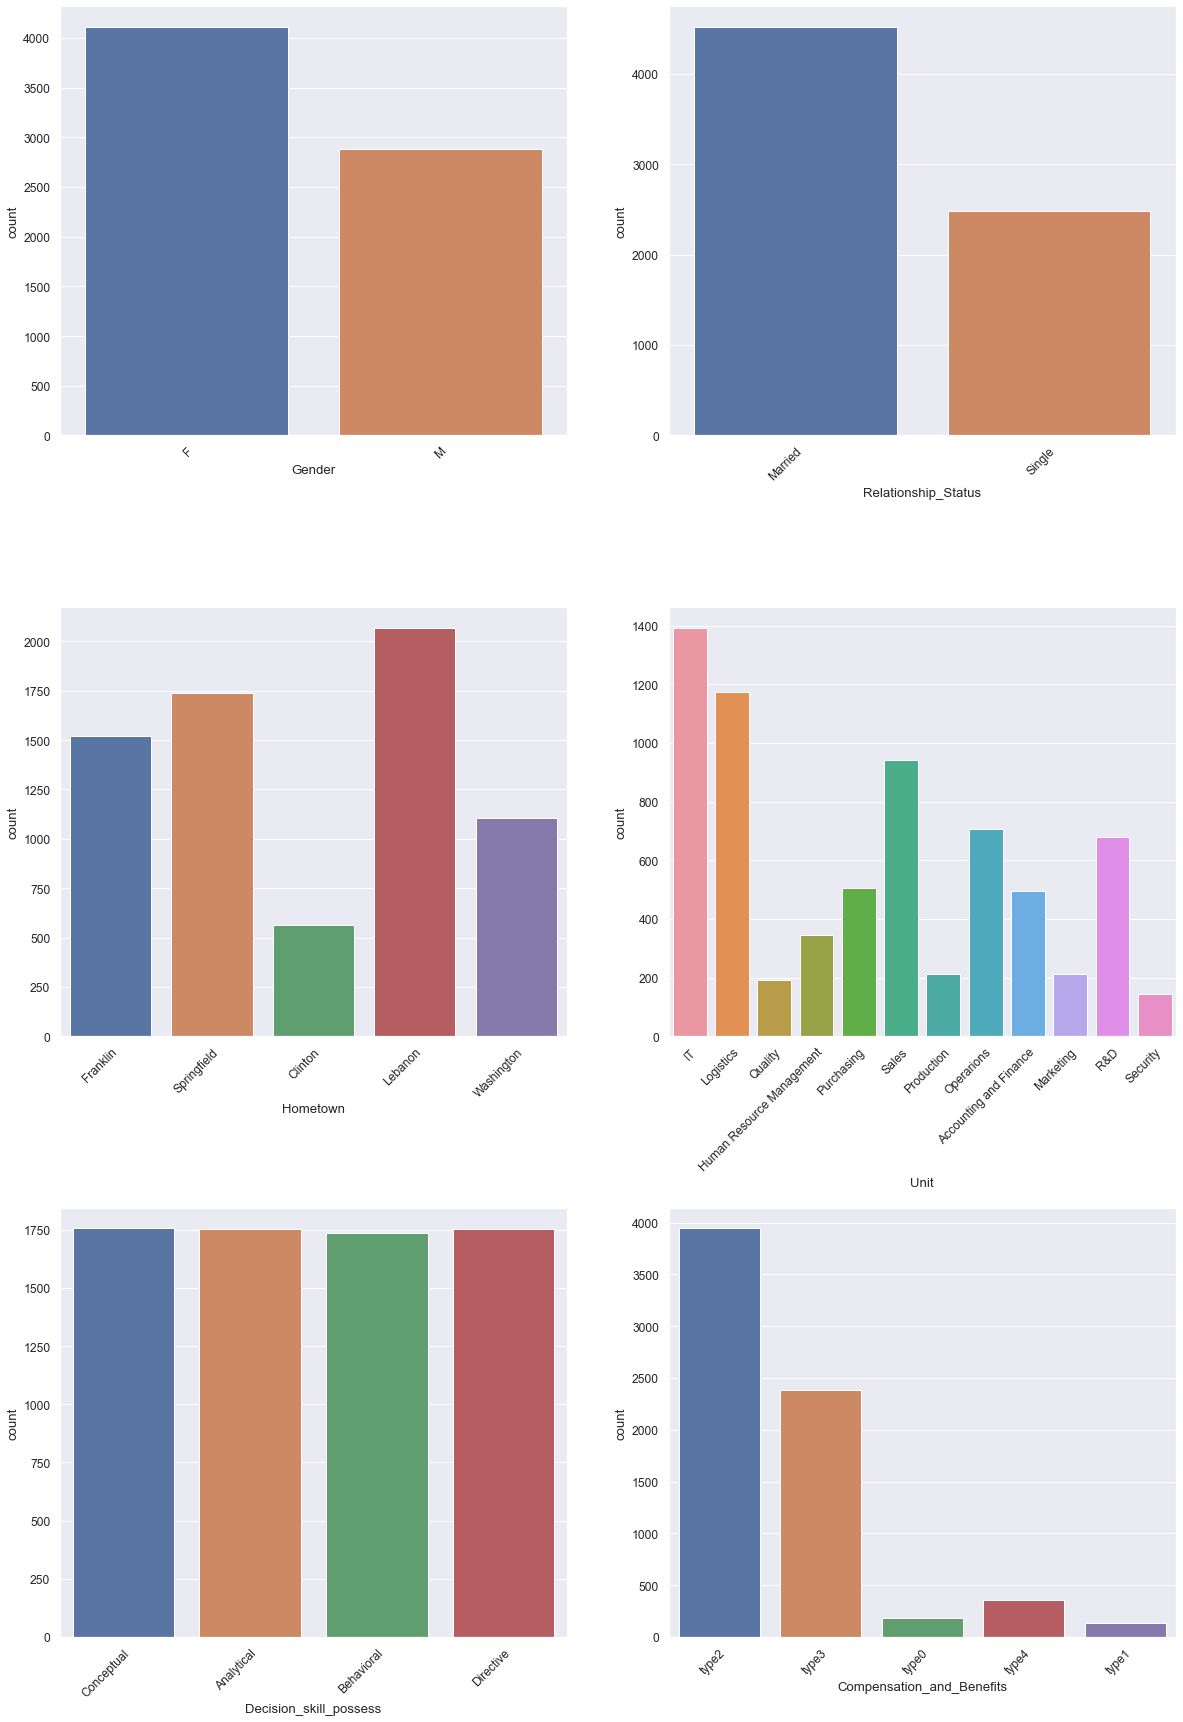

In [197]:
plot_categorical_columns(train)

<strong>Let's plot numerical columns.</strong>
Using standard and customized function.

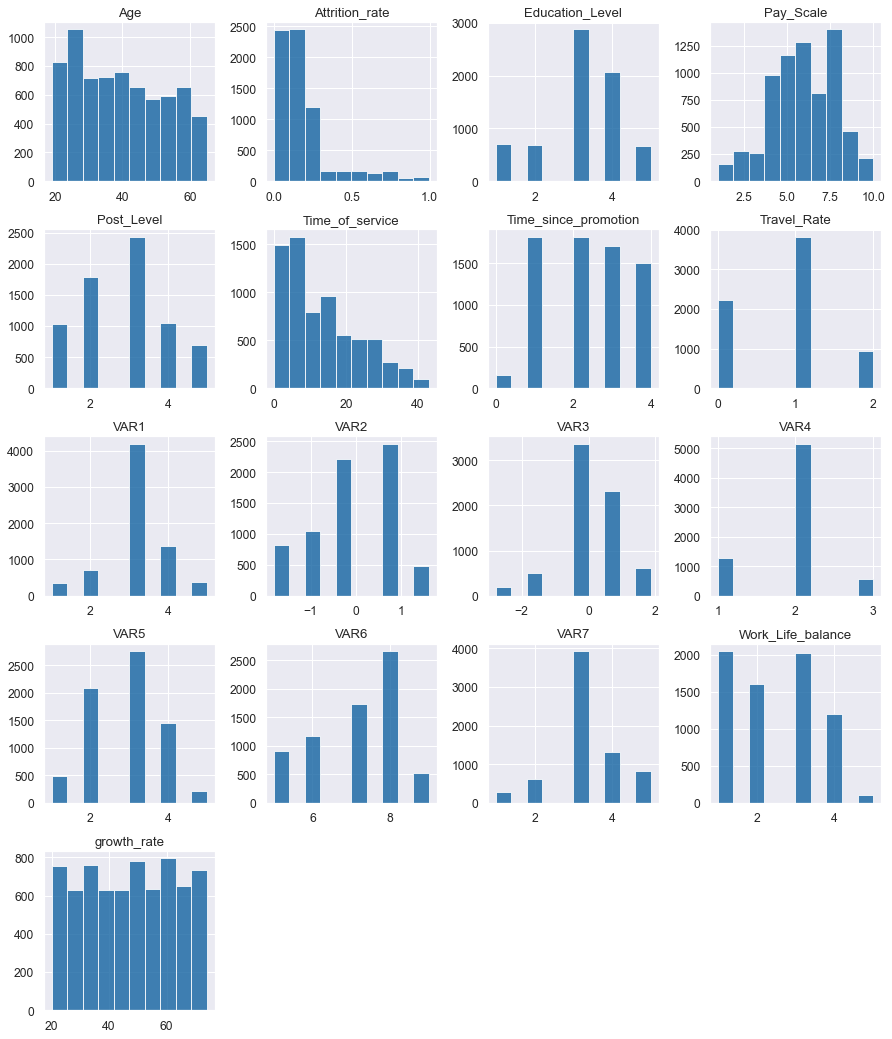

In [198]:
hist = train.hist(figsize = (15, 22), layout=(6, 4) , color='#1363a1',alpha=0.8 )

In [199]:
def plot_numerical_columns(df):
    df = df[df.select_dtypes([np.int64,np.float64]).columns]
    lcols = 2
    lrows = math.ceil(len(df.columns)/lcols)
    plt.figure(figsize=(2*lrows,2*lrows))
    plt.subplots_adjust(wspace=0.2, hspace=0.5) 
    for i, column in enumerate(df.columns):
        plt.subplot(lrows,lcols,i+1)
        sns.distplot(df[column])

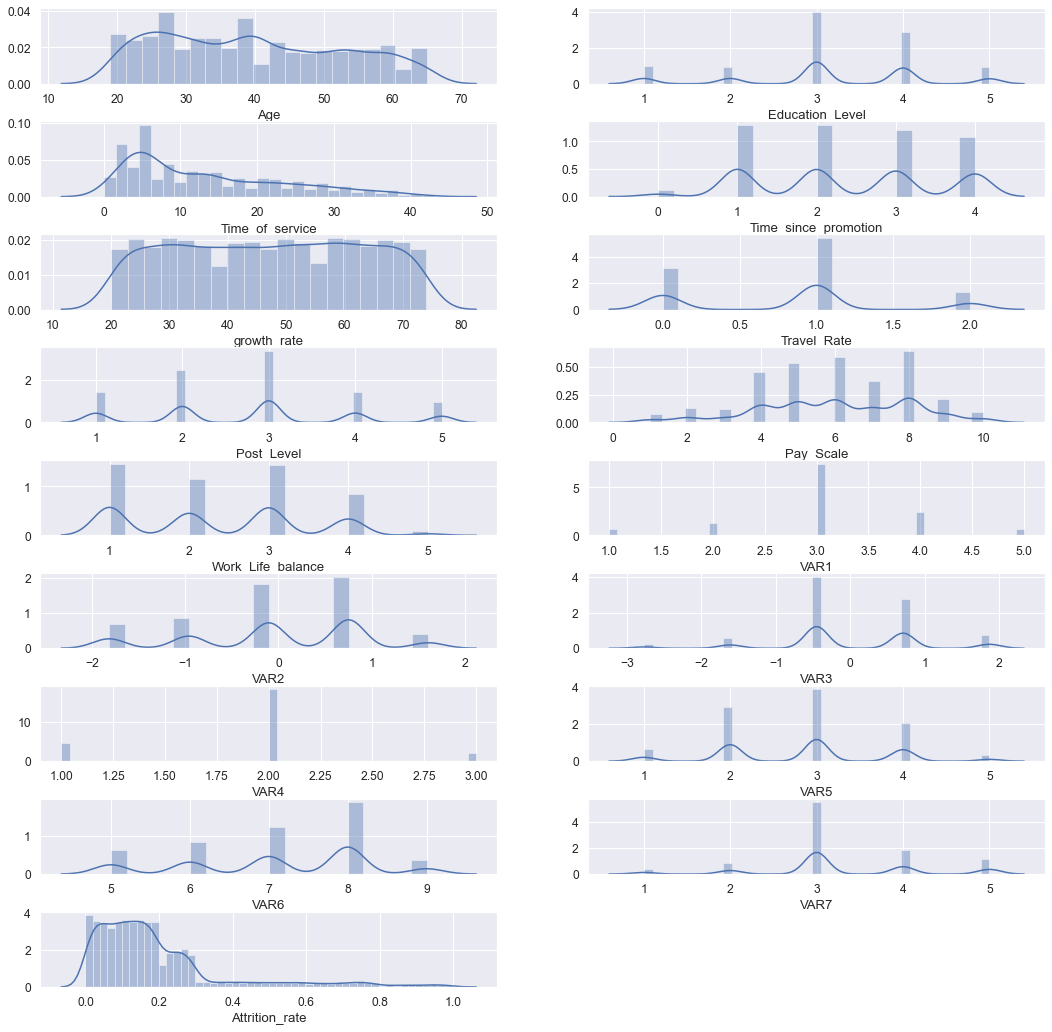

In [200]:
plot_numerical_columns(train)

<div class="alert alert-block alert-warning">
<b>5.2 Bi-variate Analysis</b>
</div><a class="anchor" id="bivariate"></a>

<strong>Let's use crosstab function.</strong> For more info <a href="https://www.earthdatascience.org/courses/earth-analytics-bootcamp/git-github-version-control/markdown-jupyter-notebook/" target="_blank">Use this link</a>. 


In [201]:
col = train.Work_Life_balance
pd.crosstab(train[l_target], [col], margins=True, margins_name="Total", normalize='index')

Work_Life_balance,1.0,2.0,3.0,4.0,5.0
Attrition_rate,,,,,
0.0,0.000000,0.750000,0.250000,0.000000,0.000
0.0001,0.000000,0.000000,0.666667,0.333333,0.000
0.0002,0.333333,0.666667,0.000000,0.000000,0.000
0.0003,0.000000,0.000000,0.500000,0.500000,0.000
0.0005,1.000000,0.000000,0.000000,0.000000,0.000
...,...,...,...,...,...
0.991,0.000000,0.000000,0.000000,0.000000,1.000
0.993,0.000000,0.000000,1.000000,0.000000,0.000
0.9957,1.000000,0.000000,0.000000,0.000000,0.000


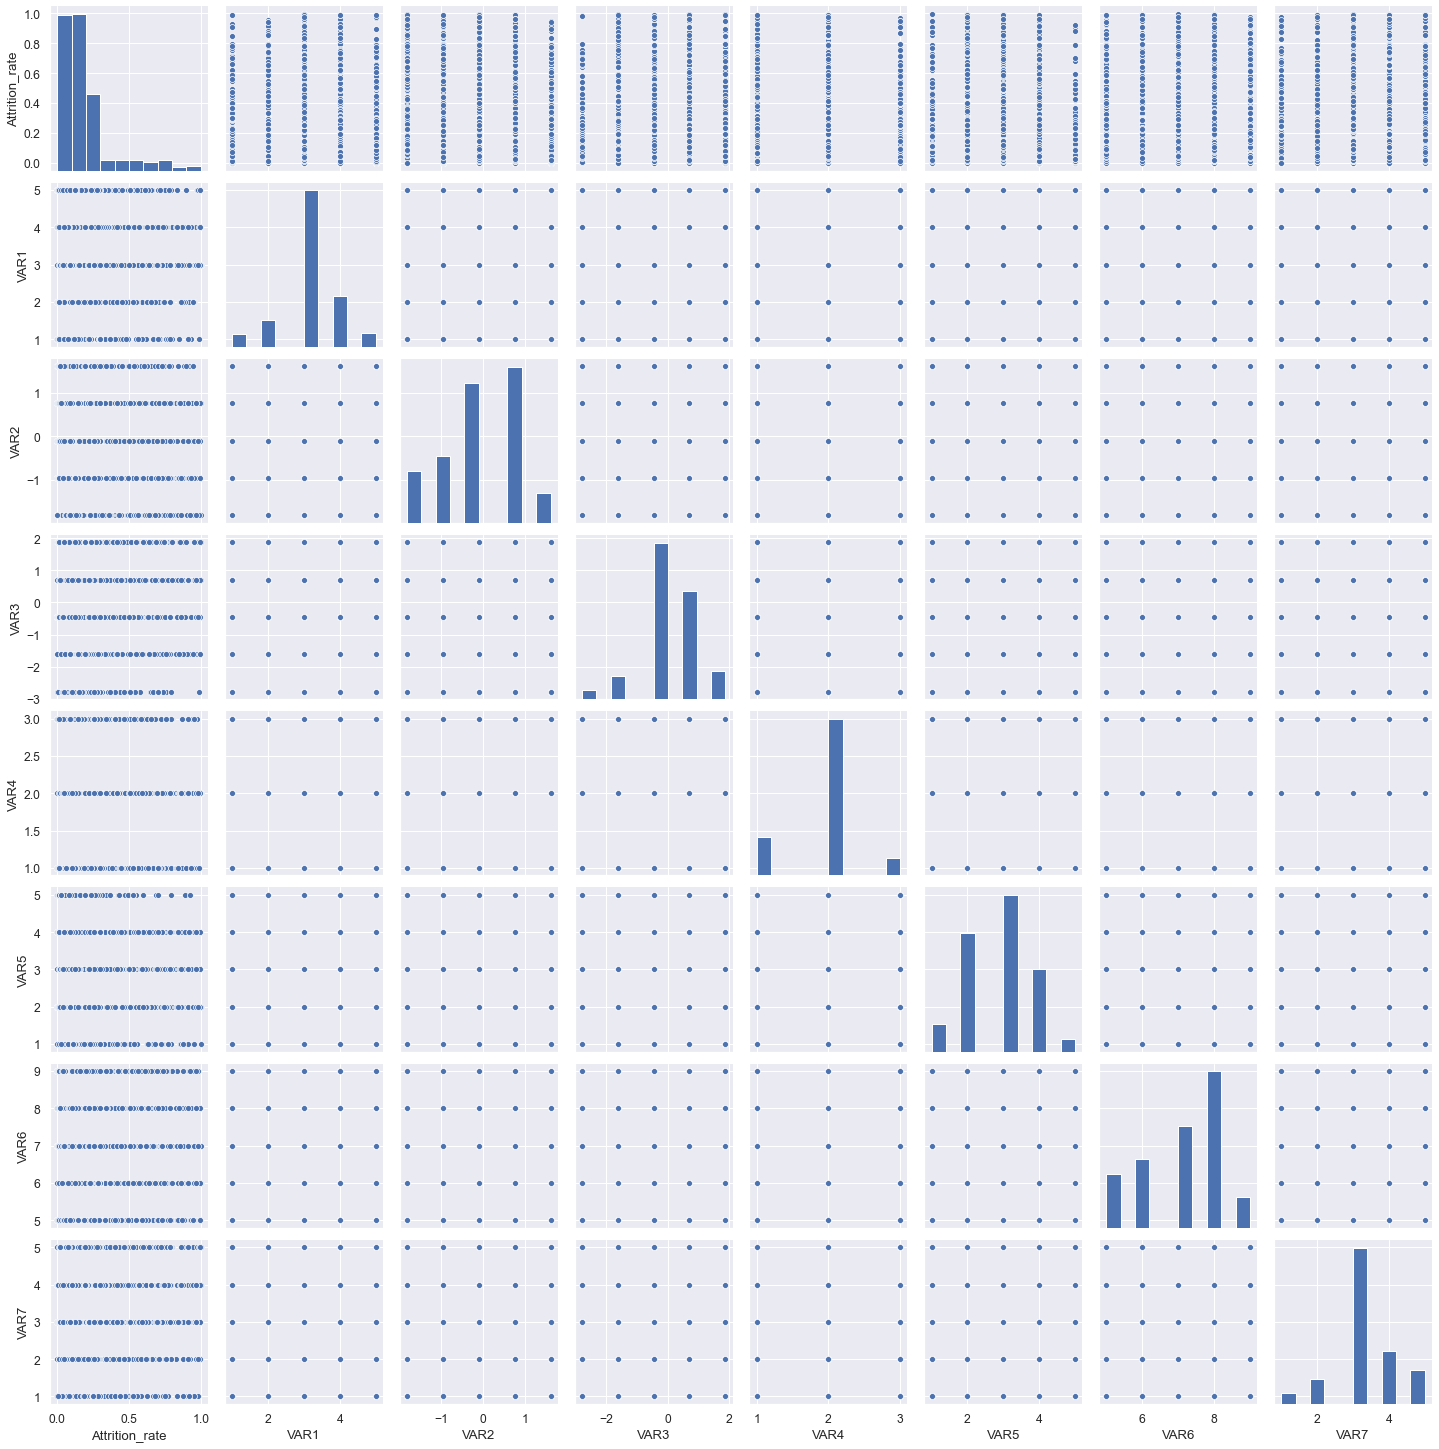

In [202]:
cols_to_review = [l_target,'VAR1','VAR2','VAR3','VAR4','VAR5','VAR6','VAR7']
sns.pairplot(train[cols_to_review])

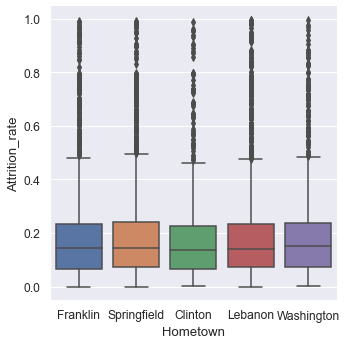

In [203]:
sns.catplot(x="Hometown", y=l_target, kind="box", data=train);

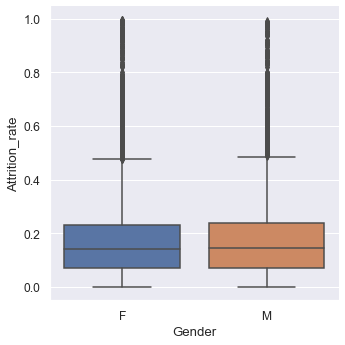

In [204]:
sns.catplot(x="Gender", y=l_target, kind="box", data=train);

In order to calculate the **correlation matrix** for pairs of categorical features, we need first to encode the textual values into numeric ones to be able to plot 

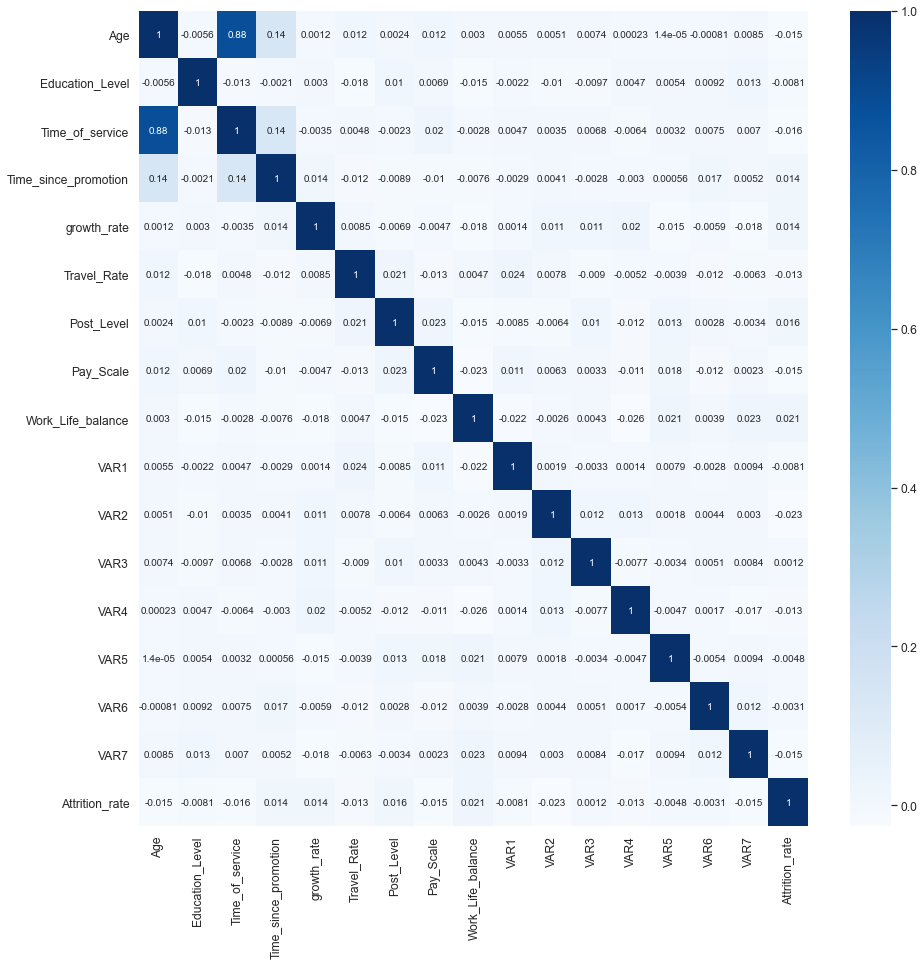

In [205]:
plt.subplots(figsize=(15,15))
data = train.corr()
sns.heatmap(data, cmap ='Blues', annot=True, annot_kws={"size": 10})

A **stacked** column plot can be useful in visualizing the relationship between two categorical variables. We can compare the percentages that each category from one variable contributes to a total across categories of the second variable.

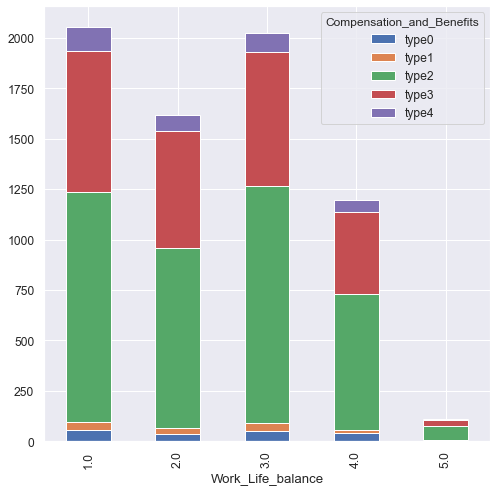

In [206]:
Work_Life_balance_vs_Compensation_and_Benefits = pd.crosstab(index=train["Work_Life_balance"], columns=train["Compensation_and_Benefits"]) 
Work_Life_balance_vs_Compensation_and_Benefits.plot(kind="bar", figsize=(8,8),stacked=True)

<div class="alert alert-block alert-warning">
<b>5.3 Multivariate Analysis</b>
</div> <a class="anchor" id="multivariate"></a>

<strong>Let's compare groups/subgroups in our data. Using colors (hue) to represent different groups</strong>

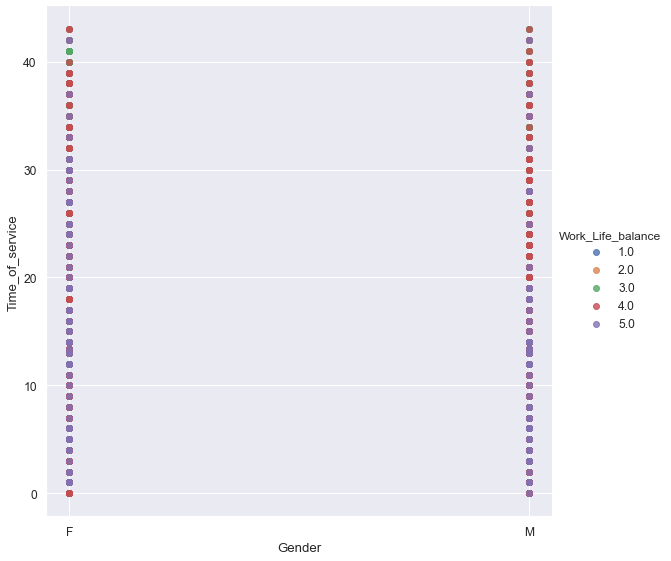

In [207]:
sns.lmplot(x='Gender', y='Time_of_service', hue='Work_Life_balance', data=train, fit_reg=False, size=8)

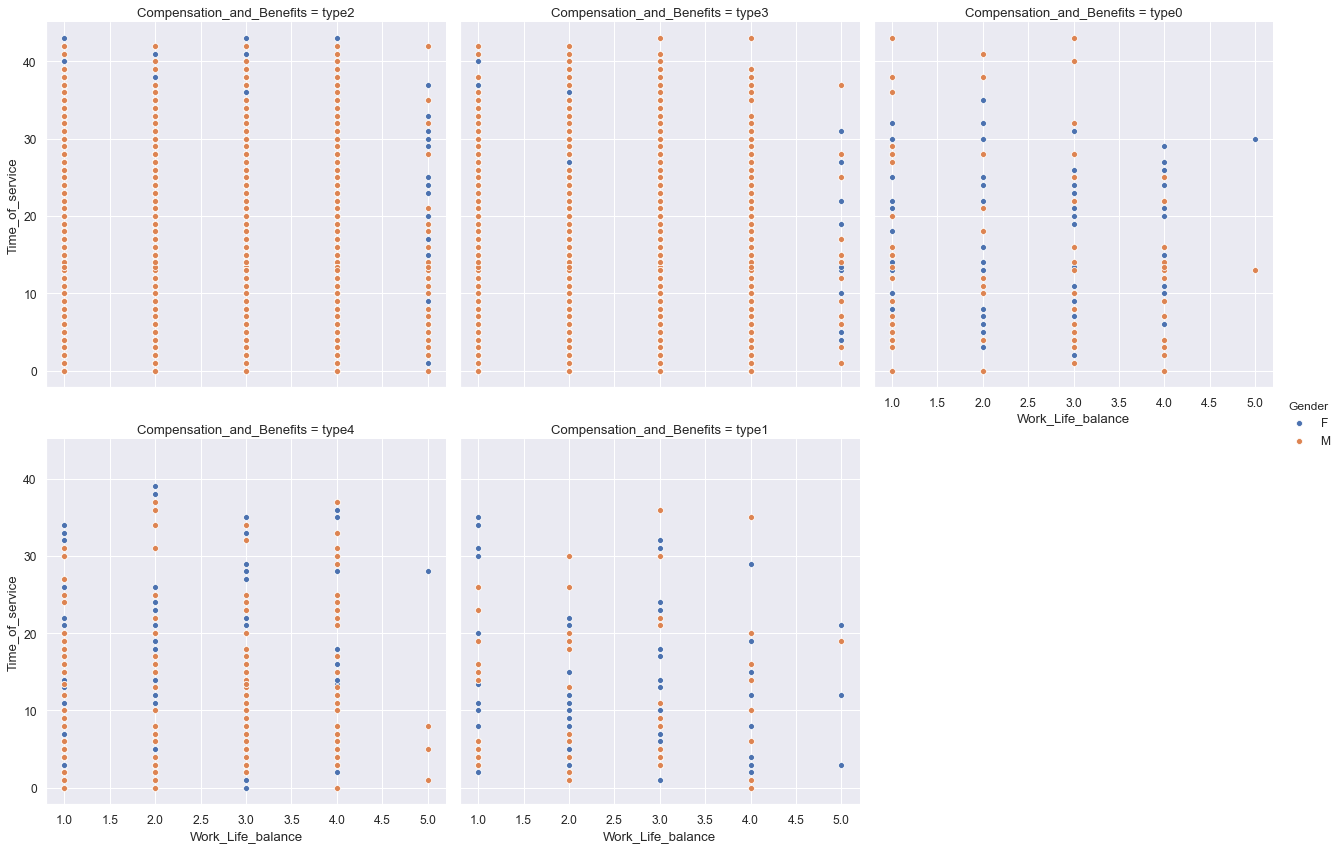

In [208]:
cond_plot = sns.FacetGrid(data=train, col='Compensation_and_Benefits', hue='Gender', col_wrap=3 , size=6,aspect=1)
cond_plot.map(sns.scatterplot, 'Work_Life_balance', 'Time_of_service').add_legend()

<div class="alert alert-block alert-info">
<b><h1>6. Feature Engineering</h1></div>
<a class="anchor" id="engineering"></a>

<strong>Let's move tables to new ones.</strong>

In [209]:
train_fe = train
test_fe = test

In [210]:
train_fe.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.008857,2.385714,3.098571,-0.016095,-0.013606,1.901286,2.834143,7.101286,3.257000,0.189376
std,13.200357,1.065102,10.257016,1.149395,15.761406,0.648205,1.163721,2.058352,1.123250,0.836377,0.948543,0.986933,0.504981,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,28.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,39.622799,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,51.000000,4.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [211]:
print("Column data types and their frequency\n{}".format(train_fe.dtypes.value_counts()))

Column data types and their frequency
int64      9
float64    8
object     6
dtype: int64


In [212]:
list_column_values(train_fe,15,'True')

**Results:**

Gender                    ==> ['F', 'M']
Age                       ==> more than 15 values
Education_Level           ==> [1, 2, 3, 4, 5]
Relationship_Status       ==> ['Married', 'Single']
Hometown                  ==> ['Clinton', 'Franklin', 'Lebanon', 'Springfield', 'Washington']
Unit                      ==> ['Accounting and Finance', 'Human Resource Management', 'IT', 'Logistics', 'Marketing', 'Operarions', 'Production', 'Purchasing', 'Quality', 'R&D', 'Sales', 'Security']
Decision_skill_possess    ==> ['Analytical', 'Behavioral', 'Conceptual', 'Directive']
Time_of_service           ==> more than 15 values
Time_since_promotion      ==> [0, 1, 2, 3, 4]
growth_rate               ==> more than 15 values
Travel_Rate               ==> [0, 1, 2]
Post_Level                ==> [1, 2, 3, 4, 5]
Pay_Scale                 ==> [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Compensation_and_Benefits ==> ['type0', 'type1', 'type2', 'type3', 'type4']
Work_Life_balance         ==> [1.0, 2.0, 3

<strong>Let's review specific columns distribution.</strong>

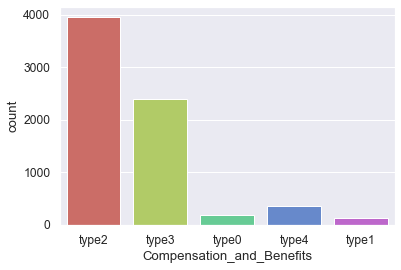

In [213]:
sns.countplot(x='Compensation_and_Benefits',data=train_fe, palette='hls')
plt.show();

<div class="alert alert-block alert-warning">
<b>6.1 General Transformation</b>
</div> <a class="anchor" id="general_trans"></a>

<strong>Let's replace categorical values with numerical values.</strong>

In [214]:
#train_fe['satisfaction'].replace(['neutral or dissatisfied','satisfied'],[0,1],inplace=True)

In [215]:
#test_fe['satisfaction'].replace(['neutral or dissatisfied','satisfied'],[0,1],inplace=True)

In [216]:
print("Column data types and their frequency\n{}".format(train_fe.dtypes.value_counts()))

Column data types and their frequency
int64      9
float64    8
object     6
dtype: int64


<div class="alert alert-block alert-warning">
<b>6.2 Encoding</b>
</div> <a class="anchor" id="encoding"></a>

In [217]:
train_fe.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


Basically the <strong>fit </strong>method, prepare the encoder (fit on your data i.e. prepare the mapping) but don't transform the data.
You have to call <strong>transform</strong> to transform the data , or use <strong>fit_transform</strong> which fit and transform the same data.

In [218]:
print("Column data types and their frequency\n{}".format(train_fe.dtypes.value_counts()))

Column data types and their frequency
int64      9
float64    8
object     6
dtype: int64


### LABEL ENCODER

In [219]:
def labelencoder(df, encode_cols ):
    '''
    Label Encoder function
    '''
    print('Processing label encoder features..\nOld df shape:{}'.format(df.shape))
    enc = LabelEncoder()
    for col in encode_cols:
        enc.fit(df[col])
        df[col] = enc.transform(df[col])
    display(Markdown('**Results:**'))
    print('New df shape:{}'.format(df.shape))
    return df

<strong>This dataset does not have any candidate to use label encoder </strong>

In [220]:
encode_cols = []
train_fe = labelencoder(train_fe,encode_cols)

Processing label encoder features..
Old df shape:(7000, 23)


**Results:**

New df shape:(7000, 23)


In [221]:
test_fe = labelencoder(test_fe,encode_cols)

Processing label encoder features..
Old df shape:(3000, 22)


**Results:**

New df shape:(3000, 22)


In [222]:
train_fe.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


### ORDINAL ENCODER

<strong>Let's apply ordinal encoder using pandas factorize method for ordinal data </strong><br>

In [223]:
def ordinalencoder(df_col, categories ):
    '''
    Ordinal Encoder function
    '''
    # Using pandas factorize method for ordinal data
    l_categories = pd.Categorical(df_col, categories, ordered=True)
    l_col = df_col.name
    # Factorizing the column data
    labels, unique = pd.factorize(l_categories, sort=True)
    df_col = labels
    display(Markdown('**Results:**'))
    print('Conversion applied to column: {}'.format(l_col))
    return df_col

In [224]:
train_fe['Compensation_and_Benefits'].unique().tolist()

['type2', 'type3', 'type0', 'type4', 'type1']

In [225]:
categories=['type4','type3','type2','type1','type0']

train_fe['Compensation_and_Benefits'] = ordinalencoder(train_fe['Compensation_and_Benefits'], categories)

**Results:**

Conversion applied to column: Compensation_and_Benefits


In [226]:
train_fe['Compensation_and_Benefits'].unique().tolist()

[2, 1, 4, 0, 3]

<strong>Now, let's apply it to test </strong>

In [227]:
test_fe['Compensation_and_Benefits'].unique().tolist()

['type2', 'type3', 'type0', 'type4', 'type1']

In [228]:
test_fe['Compensation_and_Benefits'] = ordinalencoder(test_fe['Compensation_and_Benefits'], categories)

**Results:**

Conversion applied to column: Compensation_and_Benefits


In [229]:
test_fe['Compensation_and_Benefits'].unique().tolist()

[2, 1, 4, 0, 3]

In [230]:
train_fe.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,1,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


### ONE HOT ENCONDER

There are several columns which require <strong>One Hot Encoding</strong> since they have values which are not in order necessarily and also the number of values are not too many.

In [231]:
def one_hot_encoder(df, cat_cols ):
    '''
    One-Hot Encoder function
    '''
    print('Creating OHE features..\nOld df shape:{}'.format(df.shape))
    df = pd.get_dummies(df, columns=cat_cols)
    print('New df shape:{}'.format(df.shape))
    return df

In [232]:
cat_cols = ['Gender','Relationship_Status','Hometown','Unit','Decision_skill_possess']
#cat_cols = ['Unit']
train_fe = one_hot_encoder(train_fe,cat_cols)
test_fe = one_hot_encoder(test_fe,cat_cols)

Creating OHE features..
Old df shape:(7000, 23)
New df shape:(7000, 43)
Creating OHE features..
Old df shape:(3000, 22)
New df shape:(3000, 42)


In [233]:
train_fe.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,42.0,4,4.0,4,33,1,1,7.0,2,3.0,...,0,0,0,0,0,0,0,0,1,0
1,24.0,3,5.0,4,36,0,3,6.0,2,4.0,...,0,0,0,0,0,0,1,0,0,0
2,58.0,3,27.0,3,51,0,2,8.0,2,1.0,...,0,0,1,0,0,0,0,0,1,0
3,26.0,3,4.0,3,56,1,3,8.0,2,1.0,...,0,0,0,0,0,0,0,1,0,0
4,31.0,1,5.0,4,62,1,3,2.0,1,3.0,...,0,0,0,0,0,0,0,0,1,0


In [234]:
test_fe.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,32.0,5,7.0,4,30,1,5,4.0,2,1.0,...,0,0,0,1,0,0,0,0,1,0
1,65.0,2,41.0,2,72,1,1,1.0,2,1.0,...,0,0,0,0,0,0,0,0,0,1
2,52.0,3,21.0,3,25,0,1,8.0,1,1.0,...,0,0,0,0,1,0,0,0,0,1
3,50.0,5,11.0,4,28,1,1,2.0,4,4.0,...,0,0,0,0,0,0,1,0,0,0
4,44.0,3,12.0,4,47,1,3,2.0,2,4.0,...,0,0,0,1,0,0,0,0,1,0


# SCALING

In [235]:
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_fe['Time_of_service'] = pd.DataFrame(scaler.fit_transform(train_fe[['Time_of_service']]))
train_fe['Time_since_promotion'] = pd.DataFrame(scaler.fit_transform(train_fe[['Time_since_promotion']]))
train_fe['growth_rate'] = pd.DataFrame(scaler.fit_transform(train_fe[['growth_rate']]))
train_fe['Age'] = pd.DataFrame(scaler.fit_transform(train_fe[['Age']]))
'''

"\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\ntrain_fe['Time_of_service'] = pd.DataFrame(scaler.fit_transform(train_fe[['Time_of_service']]))\ntrain_fe['Time_since_promotion'] = pd.DataFrame(scaler.fit_transform(train_fe[['Time_since_promotion']]))\ntrain_fe['growth_rate'] = pd.DataFrame(scaler.fit_transform(train_fe[['growth_rate']]))\ntrain_fe['Age'] = pd.DataFrame(scaler.fit_transform(train_fe[['Age']]))\n"

In [236]:
'''
test_fe['Time_of_service'] = pd.DataFrame(scaler.fit_transform(test_fe[['Time_of_service']]))
test_fe['Time_since_promotion'] = pd.DataFrame(scaler.fit_transform(test_fe[['Time_since_promotion']]))
test_fe['growth_rate'] = pd.DataFrame(scaler.fit_transform(test_fe[['growth_rate']]))
test_fe['Age'] = pd.DataFrame(scaler.fit_transform(test_fe[['Age']]))
'''

"\ntest_fe['Time_of_service'] = pd.DataFrame(scaler.fit_transform(test_fe[['Time_of_service']]))\ntest_fe['Time_since_promotion'] = pd.DataFrame(scaler.fit_transform(test_fe[['Time_since_promotion']]))\ntest_fe['growth_rate'] = pd.DataFrame(scaler.fit_transform(test_fe[['growth_rate']]))\ntest_fe['Age'] = pd.DataFrame(scaler.fit_transform(test_fe[['Age']]))\n"

In [237]:
train_fe[l_target].head()

0    0.1841
1    0.0670
2    0.0851
3    0.0668
4    0.1827
Name: Attrition_rate, dtype: float64

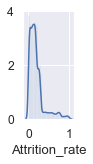

In [238]:
plot_numerical_columns(pd.DataFrame(train_fe[l_target]))

<div class="alert alert-block alert-warning">
<b>6.3 Remove Columns</b>
</div> <a class="anchor" id="remove_columns"></a>

<strong>Let's review if new correlated features cases appear</strong>

In [239]:
df_corr = train_fe[['Age','Education_Level']]

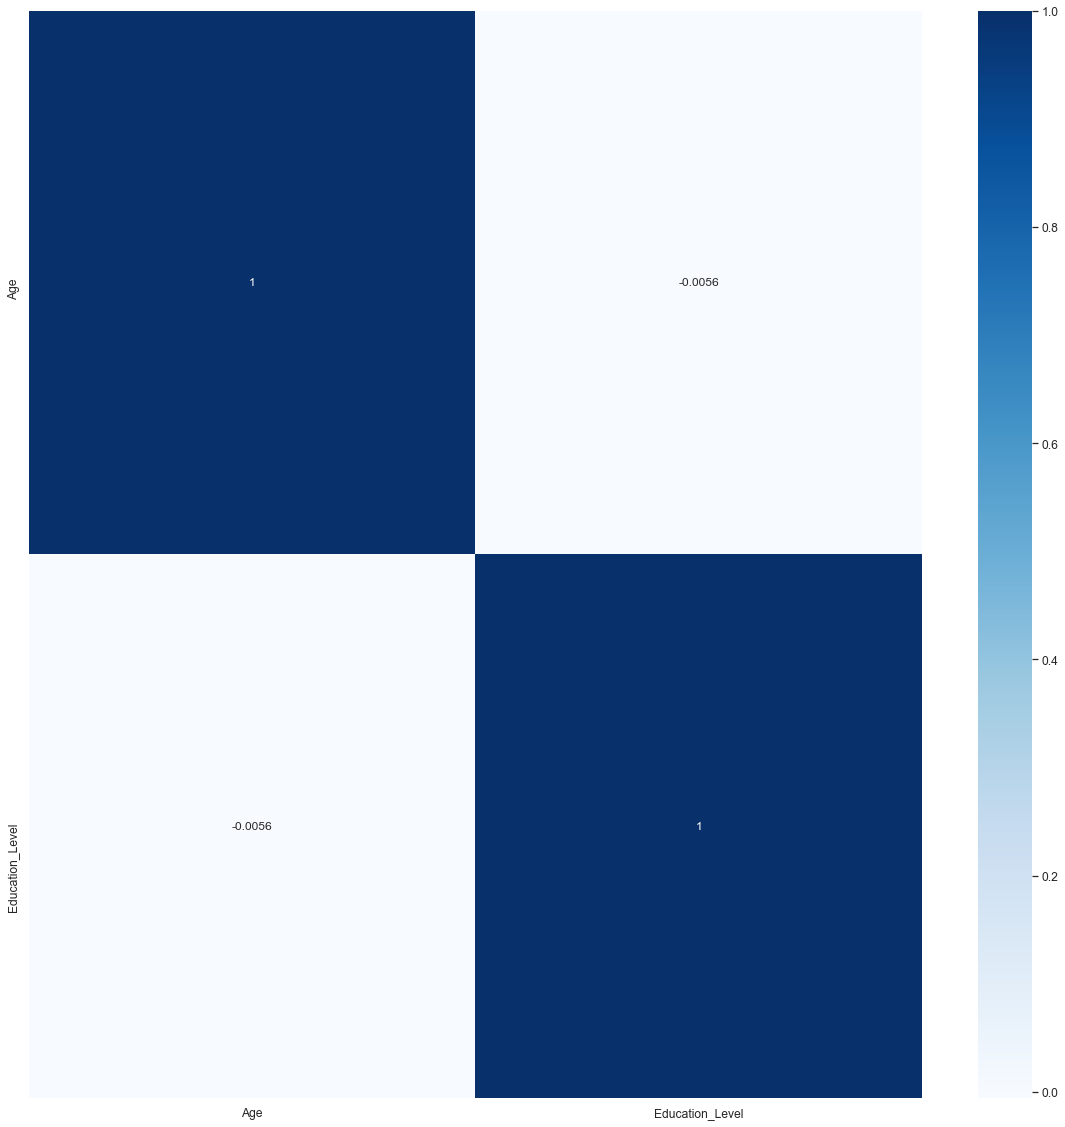

In [240]:
plt.subplots(figsize=(20,20))
data = df_corr.corr()
sns.heatmap(data, cmap ='Blues', annot=True, annot_kws={"size": 12})

<strong>Let's new columns identified as unuseful.</strong>

In [241]:
rm_col=['Gender','Hometown','Decision_skill_possess','Education_Level','Relationship_Status']
#rm_col=[]

In [242]:
train_fe = remove_column_values(train_fe, rm_col)

**Results:**

Original number of features => 43
Column: Gender does not exist
Column: Hometown does not exist
Column: Decision_skill_possess does not exist
Column: Education_Level was removed
Column: Relationship_Status does not exist
Number of features has been reduced to => 42


In [243]:
test_fe = remove_column_values(test_fe, rm_col)

**Results:**

Original number of features => 42
Column: Gender does not exist
Column: Hometown does not exist
Column: Decision_skill_possess does not exist
Column: Education_Level was removed
Column: Relationship_Status does not exist
Number of features has been reduced to => 41


In [244]:
train_fe.head()

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,42.0,4.0,4,33,1,1,7.0,2,3.0,4,...,0,0,0,0,0,0,0,0,1,0
1,24.0,5.0,4,36,0,3,6.0,2,4.0,3,...,0,0,0,0,0,0,1,0,0,0
2,58.0,27.0,3,51,0,2,8.0,2,1.0,4,...,0,0,1,0,0,0,0,0,1,0
3,26.0,4.0,3,56,1,3,8.0,2,1.0,3,...,0,0,0,0,0,0,0,1,0,0
4,31.0,5.0,4,62,1,3,2.0,1,3.0,1,...,0,0,0,0,0,0,0,0,1,0


In [245]:
test_fe.head()

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,32.0,7.0,4,30,1,5,4.0,2,1.0,3,...,0,0,0,1,0,0,0,0,1,0
1,65.0,41.0,2,72,1,1,1.0,2,1.0,4,...,0,0,0,0,0,0,0,0,0,1
2,52.0,21.0,3,25,0,1,8.0,1,1.0,4,...,0,0,0,0,1,0,0,0,0,1
3,50.0,11.0,4,28,1,1,2.0,4,4.0,3,...,0,0,0,0,0,0,1,0,0,0
4,44.0,12.0,4,47,1,3,2.0,2,4.0,4,...,0,0,0,1,0,0,0,0,1,0


<div class="alert alert-block alert-info">
<b><h1>7. Using Amazon SageMaker</h1></div>
<a class="anchor" id="sagemaker"></a>

<div class="alert alert-block alert-warning">
<b>7.1 Formatting dataset</b>
</div> <a class="anchor" id="formatting_aws"></a>

In [246]:
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, f1_score
from lightgbm import LGBMClassifier

from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced

import itertools
import scipy.stats as ss

In [247]:
X = train_fe.drop([l_target], axis=1)
y = train_fe[l_target].reset_index(drop=True)

X_test = test_fe#.drop([l_target], axis=1)

X.shape, y.shape, X_test.shape

((7000, 41), (7000,), (3000, 41))

In [248]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
def apply_feature_scale(data,features,target,scaler='MinMaxScaler'):
    '''
        Feature Scaling
        input   data = X_train, X_test, y_train, y_test
                scaler = either 'StandardScaler' or 'MinMaxScaler' or 'RobustScaler'
        output data = X_train, X_test, y_train, y_test
    '''
    X_train, X_test, y_train, y_test = data
    scalers = {'StandardScaler':StandardScaler(),'MinMaxScaler':MinMaxScaler(),'RobustScaler':RobustScaler()}

    X_train_no_scale = X_train[[col for col in X_train.columns if col not in features]]
    X_test_no_scale = X_test[[col for col in X_test.columns if col not in features]]
    X_train_to_scale = X_train[[col for col in X_train.columns if col in features]]
    X_test_to_scale = X_test[[col for col in X_test.columns if col in features]]
    
  #  features = train_fe[['Time_of_service','Time_since_promotion','growth_rate','Age']]
    
    scalerX = scalers[scaler]
    scalerY = scalers[scaler]

   # X_train_scale = pd.DataFrame(scalerX.fit_transform(X_train[features]) , X_train.index)
  #  X_test_scale = pd.DataFrame(scalerX.fit_transform(X_test[features]) , X_test.index )
    
    sc_X_train= pd.DataFrame(scalerX.fit_transform(X_train_to_scale),columns=X_train_to_scale.columns,index=X_train_to_scale.index)
    sc_X_test = pd.DataFrame(scalerX.fit_transform(X_test_to_scale),columns=X_test_to_scale.columns,index=X_test_to_scale.index)   
        
    X_train_scale = pd.concat([sc_X_train,X_train_no_scale],axis=1)
    X_test_scale = pd.concat([sc_X_test,X_test_no_scale],axis=1)
    
    y_train_scale = pd.DataFrame(scalerY.fit_transform(  pd.DataFrame(y_train)[[target]] , y_train.index  ))
    y_test_scale = pd.DataFrame(scalerY.fit_transform(   pd.DataFrame(y_test)[[target]]  , y_test.index ))
    
    data = X_train_scale, X_test_scale, y_train_scale.iloc[:,0], y_test_scale.iloc[:,0], scalerX, scalerY
    
    
    return data

In [249]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2 , random_state=42)

In [250]:
x_train[['Time_of_service','Time_since_promotion','growth_rate','Age']]

,Time_of_service,Time_since_promotion,growth_rate,Age
1032,0.0,0,42,19.000000
6339,7.0,3,52,39.622799
3886,18.0,3,37,40.000000
2653,3.0,3,71,22.000000
6914,18.0,3,21,49.000000
...,...,...,...,...
3772,3.0,1,23,22.000000
5191,36.0,3,40,64.000000
5226,6.0,3,66,25.000000
5390,2.0,2,44,21.000000


In [251]:
data = x_train, x_val, y_train, y_val
features = ['Time_of_service','Time_since_promotion','growth_rate','Age']
new_data = apply_feature_scale(data, features ,l_target,'MinMaxScaler')

In [252]:
#x_train[features], x_val[features], y_train[l_target], y_val[l_target] = data
x_train, x_val, y_train, y_val, features_scaler, target_scaler = new_data

In [253]:
x_train

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
1032,0.000000,0.000000,0.00,0.407407,1,2,10.0,2,2.0,4,...,0,1,0,0,0,0,0,0,1,0
6339,0.448322,0.162791,0.75,0.592593,1,3,6.0,1,3.0,4,...,0,0,0,1,0,0,0,0,1,0
3886,0.456522,0.418605,0.75,0.314815,0,5,6.0,2,3.0,2,...,0,0,0,0,0,0,0,1,0,0
2653,0.065217,0.069767,0.75,0.944444,2,2,8.0,4,1.0,4,...,0,0,0,0,0,0,0,1,0,0
6914,0.652174,0.418605,0.75,0.018519,1,2,7.0,2,2.0,2,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.065217,0.069767,0.25,0.055556,0,4,4.0,2,2.0,1,...,1,0,0,0,0,0,1,0,0,0
5191,0.978261,0.837209,0.75,0.370370,0,2,4.0,2,2.0,3,...,0,0,0,0,1,0,1,0,0,0
5226,0.130435,0.139535,0.75,0.851852,2,2,1.0,2,3.0,3,...,0,0,0,0,0,0,0,1,0,0
5390,0.043478,0.046512,0.50,0.444444,1,5,6.0,2,2.0,3,...,0,0,0,0,0,0,0,0,1,0


In [254]:
y_train

0       0.191724
1       0.141408
2       0.170533
3       0.048006
4       0.048308
          ...   
5595    0.249071
5596    0.134478
5597    0.001406
5598    0.134378
5599    0.195440
Name: 0, Length: 5600, dtype: float64

In [255]:
features_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [256]:
x_val.head()

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
6500,0.347826,0.285714,1.00,0.648148,0,3,4.0,2,4.0,3,...,0,0,0,0,0,1,0,0,1,0
2944,0.543478,0.500000,1.00,0.500000,0,5,7.0,2,3.0,3,...,0,0,0,0,1,0,0,1,0,0
2024,0.347826,0.309524,0.25,0.685185,0,2,6.0,2,3.0,4,...,0,0,0,0,0,0,0,0,0,1
263,0.195652,0.119048,0.25,0.574074,0,1,8.0,2,1.0,2,...,0,0,0,0,1,0,0,0,1,0
4350,0.086957,0.095238,0.50,0.944444,1,2,6.0,2,3.0,3,...,0,0,0,0,0,0,0,1,0,0


In [257]:
X

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,42.0,4.0,4,33,1,1,7.0,2,3.0,4,...,0,0,0,0,0,0,0,0,1,0
1,24.0,5.0,4,36,0,3,6.0,2,4.0,3,...,0,0,0,0,0,0,1,0,0,0
2,58.0,27.0,3,51,0,2,8.0,2,1.0,4,...,0,0,1,0,0,0,0,0,1,0
3,26.0,4.0,3,56,1,3,8.0,2,1.0,3,...,0,0,0,0,0,0,0,1,0,0
4,31.0,5.0,4,62,1,3,2.0,1,3.0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,23.0,4.0,1,20,1,2,6.0,1,3.0,1,...,0,0,0,0,0,0,0,1,0,0
6996,44.0,16.0,2,59,0,2,4.0,1,3.0,2,...,0,0,0,1,0,0,1,0,0,0
6997,49.0,10.0,1,59,1,2,3.0,2,4.0,2,...,0,0,0,0,0,0,0,0,0,1
6998,47.0,24.0,1,21,1,5,8.0,4,2.0,4,...,0,0,0,0,1,0,0,1,0,0


In [258]:
test_fe

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,32.000000,7.0,4,30,1,5,4.0,2,1.0,3,...,0,0,0,1,0,0,0,0,1,0
1,65.000000,41.0,2,72,1,1,1.0,2,1.0,4,...,0,0,0,0,0,0,0,0,0,1
2,52.000000,21.0,3,25,0,1,8.0,1,1.0,4,...,0,0,0,0,1,0,0,0,0,1
3,50.000000,11.0,4,28,1,1,2.0,4,4.0,3,...,0,0,0,0,0,0,1,0,0,0
4,44.000000,12.0,4,47,1,3,2.0,2,4.0,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,32.000000,3.0,3,38,1,3,6.0,2,2.0,1,...,0,0,0,0,1,0,0,0,0,1
2996,39.797816,10.0,2,57,1,4,9.0,2,1.0,3,...,0,0,0,0,0,0,0,0,1,0
2997,60.000000,35.0,1,69,0,2,9.0,1,3.0,3,...,0,0,0,0,0,0,1,0,0,0
2998,51.000000,23.0,1,30,0,2,6.0,1,1.0,5,...,0,0,0,0,0,0,0,1,0,0


In [259]:

train_data = X
y = y

test_data = test_fe

train_data.shape, y.shape, test_data.shape

((7000, 41), (7000,), (3000, 41))

In [260]:
y

0       0.1841
1       0.0670
2       0.0851
3       0.0668
4       0.1827
         ...  
6995    0.7839
6996    0.1055
6997    0.7847
6998    0.4162
6999    0.0910
Name: Attrition_rate, Length: 7000, dtype: float64

In [261]:
y.head()

0    0.1841
1    0.0670
2    0.0851
3    0.0668
4    0.1827
Name: Attrition_rate, dtype: float64

In [262]:
train_data

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,42.0,4.0,4,33,1,1,7.0,2,3.0,4,...,0,0,0,0,0,0,0,0,1,0
1,24.0,5.0,4,36,0,3,6.0,2,4.0,3,...,0,0,0,0,0,0,1,0,0,0
2,58.0,27.0,3,51,0,2,8.0,2,1.0,4,...,0,0,1,0,0,0,0,0,1,0
3,26.0,4.0,3,56,1,3,8.0,2,1.0,3,...,0,0,0,0,0,0,0,1,0,0
4,31.0,5.0,4,62,1,3,2.0,1,3.0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,23.0,4.0,1,20,1,2,6.0,1,3.0,1,...,0,0,0,0,0,0,0,1,0,0
6996,44.0,16.0,2,59,0,2,4.0,1,3.0,2,...,0,0,0,1,0,0,1,0,0,0
6997,49.0,10.0,1,59,1,2,3.0,2,4.0,2,...,0,0,0,0,0,0,0,0,0,1
6998,47.0,24.0,1,21,1,5,8.0,4,2.0,4,...,0,0,0,0,1,0,0,1,0,0


In [282]:
import numpy as np
import pandas as pd
from time import time

import xgboost as xgb
import lightgbm as lgb
from sklearn.datasets import load_digits
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [264]:
def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""

    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)

    # Get current parameters and the best parameters
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest MSE: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))

    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")

In [265]:
bayes_cv_tuner = BayesSearchCV(
    estimator = lgb.LGBMRegressor(objective='regression', boosting_type='gbdt', 
                                 # subsample=0.6143,
                                  metric='rmse'), #colsample_bytree=0.6453, subsample=0.6143
    search_spaces = {
       # 'learning_rate': (0.01, 1.0, 'log-uniform'),
        'learning_rate': (0.001,0.005,0.01,0.02,0.03, 0.05,0.07,0.1,0.3,0.5),
        'num_leaves': (8,10, 12,15, 20,30,50,60),
        'max_depth': (0,10,12, 15,25, 75, 100),
     #   'min_child_samples': (0, 50),
        'max_bin': (15,20,25,50,100, 1000),
        'colsample_bytree':(0.1,0.2,0.4,0.6,0.7,0.8,0.9),
        'bagging_fraction': (0.1,0.2,0.4,0.6,0.7,0.8,0.9),
        #'subsample_freq': (0, 10),
      #  'min_child_weight': (0, 10),
       # 'reg_lambda': (1e-9, 2, 'log-uniform'),
      #  'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        
         'lambda_l1': (0.01, 2.0, 'log-uniform'),
         'lambda_l2':(0.01, 2.0, 'log-uniform'),
        
      #  'scale_pos_weight': (1e-6, 500, 'log-uniform'),
        'n_estimators': (8,10,12,15,25,35,50,75,100,120,150)
    },
    scoring = 'neg_mean_squared_error', #neg_mean_squared_log_error
    cv = KFold(
        n_splits=12,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 1,
    n_iter = 50,#100
    verbose = 0,
    refit = True,
    random_state = 42
)

In [266]:
type(y_train)

pandas.core.series.Series

In [267]:
# Fit the model
result = bayes_cv_tuner.fit(x_train, y_train, callback=status_print)

Model #1
Best MSE: -0.0353
Best params: OrderedDict([('bagging_fraction', 0.4), ('colsample_bytree', 0.8), ('lambda_l1', 1.4013842988724345), ('lambda_l2', 0.05329228444240296), ('learning_rate', 0.07), ('max_bin', 25), ('max_depth', 12), ('n_estimators', 100), ('num_leaves', 12)])

Model #2
Best MSE: -0.0353
Best params: OrderedDict([('bagging_fraction', 0.4), ('colsample_bytree', 0.8), ('lambda_l1', 1.4013842988724345), ('lambda_l2', 0.05329228444240296), ('learning_rate', 0.07), ('max_bin', 25), ('max_depth', 12), ('n_estimators', 100), ('num_leaves', 12)])

Model #3
Best MSE: -0.0347
Best params: OrderedDict([('bagging_fraction', 0.6), ('colsample_bytree', 0.9), ('lambda_l1', 0.017429465504408544), ('lambda_l2', 0.0993371681508887), ('learning_rate', 0.005), ('max_bin', 25), ('max_depth', 10), ('n_estimators', 100), ('num_leaves', 20)])

Model #4
Best MSE: -0.0347
Best params: OrderedDict([('bagging_fraction', 0.6), ('colsample_bytree', 0.9), ('lambda_l1', 0.017429465504408544), ('

Model #30
Best MSE: -0.0347
Best params: OrderedDict([('bagging_fraction', 0.1), ('colsample_bytree', 0.1), ('lambda_l1', 0.15569719161682474), ('lambda_l2', 0.28678462686987494), ('learning_rate', 0.01), ('max_bin', 15), ('max_depth', 75), ('n_estimators', 150), ('num_leaves', 10)])

Model #31
Best MSE: -0.0347
Best params: OrderedDict([('bagging_fraction', 0.1), ('colsample_bytree', 0.1), ('lambda_l1', 0.15569719161682474), ('lambda_l2', 0.28678462686987494), ('learning_rate', 0.01), ('max_bin', 15), ('max_depth', 75), ('n_estimators', 150), ('num_leaves', 10)])

Model #32
Best MSE: -0.0347
Best params: OrderedDict([('bagging_fraction', 0.1), ('colsample_bytree', 0.1), ('lambda_l1', 0.15569719161682474), ('lambda_l2', 0.28678462686987494), ('learning_rate', 0.01), ('max_bin', 15), ('max_depth', 75), ('n_estimators', 150), ('num_leaves', 10)])

Model #33
Best MSE: -0.0347
Best params: OrderedDict([('bagging_fraction', 0.1), ('colsample_bytree', 0.1), ('lambda_l1', 0.15569719161682474)

In [268]:
result.best_params_

OrderedDict([('bagging_fraction', 0.1),
             ('colsample_bytree', 0.1),
             ('lambda_l1', 0.15569719161682474),
             ('lambda_l2', 0.28678462686987494),
             ('learning_rate', 0.01),
             ('max_bin', 15),
             ('max_depth', 75),
             ('n_estimators', 150),
             ('num_leaves', 10)])

In [269]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [270]:
target_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [317]:
pred_y = bayes_cv_tuner.predict(x_val)
pred_y

array([0.19640303, 0.19229914, 0.19903297, ..., 0.19365277, 0.19252025,
       0.18714193])

In [271]:
pred_y = bayes_cv_tuner.predict(x_val)
pred_y = pd.DataFrame(pred_y)
pred_y = target_scaler.inverse_transform(pred_y)

#pred_y = np.expm1(pred_y)

In [318]:
pred_y

array([0.19640303, 0.19229914, 0.19903297, ..., 0.19365277, 0.19252025,
       0.18714193])

In [272]:
type(pred_y)

numpy.ndarray

In [273]:
print("RMSE : ", np.sqrt(mean_squared_error(y_val, pred_y)  ))

RMSE :  0.18723005861246966


In [274]:
sub = pd.DataFrame()

In [275]:
test_data

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,32.000000,7.0,4,30,1,5,4.0,2,1.0,3,...,0,0,0,1,0,0,0,0,1,0
1,65.000000,41.0,2,72,1,1,1.0,2,1.0,4,...,0,0,0,0,0,0,0,0,0,1
2,52.000000,21.0,3,25,0,1,8.0,1,1.0,4,...,0,0,0,0,1,0,0,0,0,1
3,50.000000,11.0,4,28,1,1,2.0,4,4.0,3,...,0,0,0,0,0,0,1,0,0,0
4,44.000000,12.0,4,47,1,3,2.0,2,4.0,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,32.000000,3.0,3,38,1,3,6.0,2,2.0,1,...,0,0,0,0,1,0,0,0,0,1
2996,39.797816,10.0,2,57,1,4,9.0,2,1.0,3,...,0,0,0,0,0,0,0,0,1,0
2997,60.000000,35.0,1,69,0,2,9.0,1,3.0,3,...,0,0,0,0,0,0,1,0,0,0
2998,51.000000,23.0,1,30,0,2,6.0,1,1.0,5,...,0,0,0,0,0,0,0,1,0,0


In [276]:
test_data_scaled = test_data
test_data_scaled['Time_of_service'] = pd.DataFrame(features_scaler.fit_transform(test_data_scaled[['Time_of_service']]))
test_data_scaled['Time_since_promotion'] = pd.DataFrame(features_scaler.fit_transform(test_data_scaled[['Time_since_promotion']]))
test_data_scaled['growth_rate'] = pd.DataFrame(features_scaler.fit_transform(test_data_scaled[['growth_rate']]))
test_data_scaled['Age'] = pd.DataFrame(features_scaler.fit_transform(test_data_scaled[['Age']]))


In [277]:
test_data_scaled

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
0,0.282609,0.162791,1.00,0.185185,1,5,4.0,2,1.0,3,...,0,0,0,1,0,0,0,0,1,0
1,1.000000,0.953488,0.50,0.962963,1,1,1.0,2,1.0,4,...,0,0,0,0,0,0,0,0,0,1
2,0.717391,0.488372,0.75,0.092593,0,1,8.0,1,1.0,4,...,0,0,0,0,1,0,0,0,0,1
3,0.673913,0.255814,1.00,0.148148,1,1,2.0,4,4.0,3,...,0,0,0,0,0,0,1,0,0,0
4,0.543478,0.279070,1.00,0.500000,1,3,2.0,2,4.0,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.282609,0.069767,0.75,0.333333,1,3,6.0,2,2.0,1,...,0,0,0,0,1,0,0,0,0,1
2996,0.452126,0.232558,0.50,0.685185,1,4,9.0,2,1.0,3,...,0,0,0,0,0,0,0,0,1,0
2997,0.891304,0.813953,0.25,0.907407,0,2,9.0,1,3.0,3,...,0,0,0,0,0,0,1,0,0,0
2998,0.695652,0.534884,0.25,0.185185,0,2,6.0,1,1.0,5,...,0,0,0,0,0,0,0,1,0,0


In [310]:
predictions = bayes_cv_tuner.predict(test_data)
predictions = pd.DataFrame(predictions)
predictions = target_scaler.inverse_transform(predictions) 

In [311]:
predictions = pd.DataFrame(predictions)

In [312]:
sub['Employee_ID'] = test_original['Employee_ID']
sub[l_target] = predictions
sub.to_csv('lgb_v109.csv', index =False)
sub.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.197093
1,EID_9658,0.189904
2,EID_22203,0.190598
3,EID_7652,0.190490
4,EID_6516,0.186232


In [ ]:

Employee_ID	Attrition_rate
0	EID_22713	0.191783
1	EID_9658	0.205804
2	EID_22203	0.187138
3	EID_7652	0.193942
4	EID_6516	0.187742

In [ ]:
bayes_cv_tuner_xgb = BayesSearchCV(
    estimator = xgb.XGBRegressor(objective='reg:squarederror'#, 
                                 # subsample=0.6143,
                                 # metric='rmse'
                                ), #colsample_bytree=0.6453, subsample=0.6143
    search_spaces = {
       # 'learning_rate': (0.01, 1.0, 'log-uniform'),
        'learning_rate': (0.001,0.005,0.01,0.02,0.03, 0.05,0.07,0.1,0.3,0.5),
        'max_depth': (0,10,12, 15,25, 75, 100),
     #   'min_child_samples': (0, 50),
        'max_bin': (15,20,25,50,100, 1000),
        'colsample_bytree':(0.1,0.2,0.4,0.6,0.7,0.8,0.9),
     #  'scale_pos_weight': (1e-6, 500, 'log-uniform'),
        'n_estimators': (8,10,12,15,25,35,50,75,100,120,150)
    },
    scoring = 'neg_mean_squared_error', #neg_mean_squared_log_error
    cv = KFold(
        n_splits=12,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 1,
    n_iter = 50,#100
    verbose = 0,
    refit = True,
    random_state = 42
)

In [ ]:
# Fit the model
result = bayes_cv_tuner_xgb.fit(x_train, y_train, callback=status_print)

In [ ]:

    clf = xgb.XGBRegressor(n_jobs=-1,
                           objective='reg:squarederror',
                           # n_estimators=10000, 
                            n_estimators=100, 
                            #learning_rate=0.05,                            
                           # min_child_samples=4, 
                            colsample_bytree=0.1,
                          #  reg_alpha=0.05,
                         #   num_leaves=25,
                            max_depth=2,
                           # lambda_l1= 0.5,
                           gamma=0.4,
                       #     lambda_l2= 0.1,
                          #  reg_lambda=1.0, 
                       #     bagging_fraction=.1,
                            metric='rmse')

In [291]:
def scoring(y_true, y_pred):
    from sklearn.metrics import mean_squared_error, mean_squared_log_error
    #return  np.sqrt(np.mean(np.power(np.log(y_pred) - np.log(y_true), 2)))
    return np.sqrt(mean_squared_error(y_true, y_pred))
    #return  np.sqrt(np.mean(np.power( scaler.inverse_transform(y_pred)  - scaler.inverse_transform(y_true)    , 2)))


In [292]:
%%time
import lightgbm as lgb
from sklearn.model_selection import KFold

Z_preds = []
preds = []
valid_score_list = []
#cv = KFold(n_splits=10)
cv = KFold(n_splits=12,shuffle=False,random_state=1994)

for i, (train_ind, test_ind) in enumerate(cv.split(train_data, y)):
    X_train = train_data.iloc[train_ind]
    X_valid = train_data.iloc[test_ind]
    
    Z_valid = train.iloc[test_ind]
    
    X_test = test_data.copy()

    y_train = y[train_ind].values
    y_valid = y[test_ind].values

    clf = lgb.LGBMRegressor(n_jobs=-1,
                           # n_estimators=10000, 
                            n_estimators=100, 
                            learning_rate=0.01,                            
                          #  min_child_samples=10, 
                            #colsample_bytree=0.1,
                           #reg_alpha=0.1,
                             num_leaves=150,
                            max_depth=25,
                         #   lambda_l1= 0.1,
                       #     lambda_l2= 0.1,
                          #  reg_lambda=1.0, 
                         #   bagging_fraction=.6,
                            metric='rmse')
    clf.fit(X_train, y_train,
            eval_set=[(X_valid, y_valid)], 
            early_stopping_rounds=200, 
            verbose=0)
    
    valid_prediction = clf.predict(X_valid)
    test_prediction = clf.predict(X_test)
    valid_score = scoring((y_valid), (valid_prediction))
    valid_score_list.append(valid_score)
    print("FOLD:{} SCORE:{:0.3f}".format(i+1, valid_score))
    
    preds.append(test_prediction)
    
    #Z_valid['y_valid'] = y_valid
   # Z_valid['valid_prediction'] = valid_prediction
  # Z_preds.append(Z_valid)
    
    
    
    
print("CV score is {}".format(np.mean(valid_score_list)))

FOLD:1 SCORE:0.179
FOLD:2 SCORE:0.183
FOLD:3 SCORE:0.173
FOLD:4 SCORE:0.173
FOLD:5 SCORE:0.192
FOLD:6 SCORE:0.196
FOLD:7 SCORE:0.184
FOLD:8 SCORE:0.175
FOLD:9 SCORE:0.189
FOLD:10 SCORE:0.180
FOLD:11 SCORE:0.208
FOLD:12 SCORE:0.192
CV score is 0.18527267403984424
Wall time: 7.58 s


In [293]:
preds

[array([0.22416745, 0.18245675, 0.21315054, ..., 0.21217558, 0.21012108,
        0.17619095]),
 array([0.18776234, 0.18638088, 0.18768931, ..., 0.18687792, 0.19629656,
        0.19539118]),
 array([0.18946543, 0.18978772, 0.18963131, ..., 0.18914781, 0.19043914,
        0.18967352]),
 array([0.19922706, 0.19272846, 0.19572048, ..., 0.19878894, 0.18714668,
        0.18513854]),
 array([0.19066589, 0.17926673, 0.18078214, ..., 0.19271741, 0.18395936,
        0.19095489]),
 array([0.1946607 , 0.18560002, 0.18699333, ..., 0.19096733, 0.18781957,
        0.18622022]),
 array([0.19614306, 0.19244085, 0.18209295, ..., 0.20576969, 0.18180355,
        0.2054089 ]),
 array([0.19047942, 0.18993866, 0.19089911, ..., 0.19047942, 0.19092561,
        0.19047942]),
 array([0.1900031 , 0.19110027, 0.19026945, ..., 0.19019656, 0.18889267,
        0.18919536]),
 array([0.19476122, 0.20185964, 0.198313  , ..., 0.18864387, 0.19196545,
        0.19341482]),
 array([0.18706046, 0.19693134, 0.191538  , ..., 0

In [314]:
predictions_xgb = np.mean(preds, axis=0)
predictions_xgb = pd.DataFrame(predictions_xgb)
predictions_xgb

,0
0,0.195593
1,0.189132
2,0.191830
3,0.194271
4,0.195841
...,...
2995,0.193083
2996,0.185204
2997,0.195175
2998,0.190797


In [315]:
predictions

,0
0,0.197093
1,0.189904
2,0.190598
3,0.190490
4,0.186232
...,...
2995,0.190187
2996,0.187893
2997,0.189594
2998,0.186353


In [316]:
predictions = (predictions*.8 + predictions_xgb*.2 + rf)/3

sub['Employee_ID'] = test_original['Employee_ID']
sub[l_target] = predictions
sub.to_csv('lgb_v109.csv', index =False)
sub.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.196343
1,EID_9658,0.189518
2,EID_22203,0.191214
3,EID_7652,0.192381
4,EID_6516,0.191037


In [2253]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [2255]:
# Reset results array
results = []

for min_child_samples in [1,2,3,4,5,6,7,8,9,10]:
    clf = lgb.LGBMRegressor( max_depth=25, learning_rate = 0.01, n_estimators=100,num_leaves=150,
                            min_child_samples=min_child_samples )
    clf.fit(x_train, y_train, eval_set=eval_set, verbose=False)
    results.append(
        {
            'min_child_samples': min_child_samples,
            'train_error': metrics.mean_squared_error(y_train, clf.predict(x_train)),
            'test_error': metrics.mean_squared_error(y_val, clf.predict(x_val))
        })
    
min_child_samples_lr = pd.DataFrame(results).set_index('min_child_samples').sort_index()
min_child_samples_lr

,train_error,test_error
min_child_samples,,
1,0.023925,0.035762
2,0.024041,0.035403
3,0.024292,0.035091
4,0.024630,0.034888
5,0.025029,0.034799
6,0.025442,0.035186
7,0.025719,0.034873
8,0.025952,0.034797
9,0.026025,0.034622


In [2195]:
%%time

import xgboost as xgb
from sklearn.model_selection import KFold

Z_preds = []
preds = []
valid_score_list = []
#cv = KFold(n_splits=10)
cv = KFold(n_splits=12,shuffle=False,random_state=1994)

for i, (train_ind, test_ind) in enumerate(cv.split(train_data, y)):
    X_train = train_data.iloc[train_ind]
    X_valid = train_data.iloc[test_ind]
    
    Z_valid = train.iloc[test_ind]
    
    X_test = test_data.copy()

    y_train = y[train_ind].values
    y_valid = y[test_ind].values

    clf = xgb.XGBRegressor(n_jobs=-1,
                           objective='reg:squarederror',
                           # n_estimators=10000, 
                            n_estimators=100, 
                            #learning_rate=0.05,                            
                           # min_child_samples=4, 
                            colsample_bytree=0.1,
                          #  reg_alpha=0.05,
                         #   num_leaves=25,
                            max_depth=2,
                           # lambda_l1= 0.5,
                           gamma=0.4,
                       #     lambda_l2= 0.1,
                          #  reg_lambda=1.0, 
                       #     bagging_fraction=.1,
                            metric='rmse')
    clf.fit(X_train, y_train,
            eval_set=[(X_valid, y_valid)], 
            early_stopping_rounds=100, 
            verbose=0)
    
    valid_prediction = clf.predict(X_valid)
    test_prediction = clf.predict(X_test)
    valid_score = scoring((y_valid), (valid_prediction))
    valid_score_list.append(valid_score)
    print("FOLD:{} SCORE:{:0.3f}".format(i+1, valid_score))
    
    preds.append(test_prediction)
    
    #Z_valid['y_valid'] = y_valid
   # Z_valid['valid_prediction'] = valid_prediction
  # Z_preds.append(Z_valid)
    
    
    
    
print("CV score is {}".format(np.mean(valid_score_list)))

FOLD:1 SCORE:0.180
FOLD:2 SCORE:0.184
FOLD:3 SCORE:0.173
FOLD:4 SCORE:0.174
FOLD:5 SCORE:0.193
FOLD:6 SCORE:0.196
FOLD:7 SCORE:0.185
FOLD:8 SCORE:0.176
FOLD:9 SCORE:0.190
FOLD:10 SCORE:0.181
FOLD:11 SCORE:0.208
FOLD:12 SCORE:0.193
CV score is 0.1861838777566827
Wall time: 5.43 s


In [2124]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((5600, 28), (1400, 28), (6417,), (1400,))

In [2111]:
# Create empty array to store results
results = []
# Create watchlist to keep track of train/validation performance
eval_set = [(x_train, y_train), (x_val, y_val)]
from sklearn import metrics

In [2113]:
# Enumerate through different max_depth values and store results
for max_depth in [2,3,4,5,6,7,8,9,10,12,15,20,25,30]:
    clf = xgb.XGBRegressor(max_depth=max_depth)
    clf.fit(x_train, y_train, eval_set=eval_set, verbose=False)
    results.append(
        {   
            'max_depth': max_depth,
            'train_error': metrics.mean_squared_error(y_train, clf.predict(x_train)),
            'test_error': metrics.mean_squared_error(y_val, clf.predict(x_val))
        })
    
# Display Results
max_depth_lr = pd.DataFrame(results).set_index('max_depth').sort_index()
max_depth_lr

[21:24:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:24:58] WARNI

,train_error,test_error
max_depth,,
2,3.336379e-02,0.036199
2,3.336379e-02,0.036199
3,3.170651e-02,0.036562
3,3.170651e-02,0.036562
4,2.873609e-02,0.036941
4,2.873609e-02,0.036941
5,2.425067e-02,0.037368
5,2.425067e-02,0.037368
6,1.922547e-02,0.037681


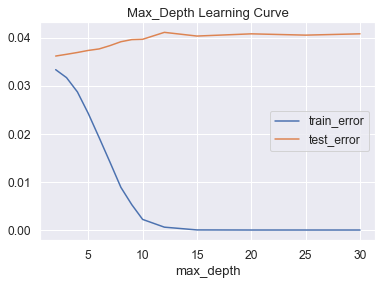

In [2114]:
# Plot Max_Depth Learning Curve
max_depth_lr.plot(title="Max_Depth Learning Curve")

In [2119]:
# Reset results array
results = []

for learning_rate in [0.005,0.008,0.01,0.05,0.1,0.2,0.4,0.6,0.8,1]:
    clf = xgb.XGBRegressor(max_depth=2,learning_rate=learning_rate, n_estimators=200)
    clf.fit(x_train, y_train, eval_set=eval_set, verbose=False)
    results.append(
        {
            'learning_rate': learning_rate,
            'train_error': metrics.mean_squared_error(y_train, clf.predict(x_train)),
            'test_error': metrics.mean_squared_error(y_val, clf.predict(x_val))
        })
    
learning_rate_lr = pd.DataFrame(results).set_index('learning_rate').sort_index()
learning_rate_lr

[21:33:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:33:14] WARNI

,train_error,test_error
learning_rate,,
0.005,0.047379,0.048764
0.008,0.038247,0.039489
0.010,0.036059,0.037267
0.050,0.033513,0.035505
0.100,0.032857,0.035728
0.200,0.031821,0.036009
0.400,0.030160,0.036740
0.600,0.028810,0.037776
0.800,0.027693,0.038945


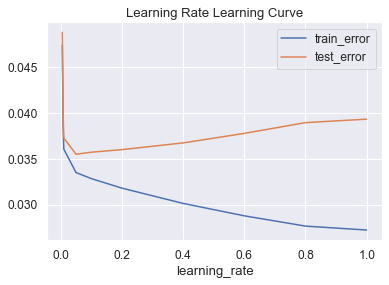

In [2120]:
# Plot Learning Rate
learning_rate_lr.plot(title="Learning Rate Learning Curve")

In [2170]:
# Reset results array
results = []

for n_estimators in [50,60,100,150,200,500,750,1000, 1500,2000,2500]:
    clf = xgb.XGBRegressor(max_depth=2,learning_rate=0.05, n_estimators=n_estimators , objective='reg:squarederror')
    clf.fit(x_train, y_train, eval_set=eval_set, verbose=False)
    results.append(
        {
            'n_estimators': n_estimators,
            'train_error': metrics.mean_squared_error(y_train, clf.predict(x_train)),
            'test_error': metrics.mean_squared_error(y_val, clf.predict(x_val))
        })
    
n_estimators_lr = pd.DataFrame(results).set_index('n_estimators').sort_index()
n_estimators_lr

,train_error,test_error
n_estimators,,
50,0.034385,0.037233
60,0.033944,0.037016
100,0.033491,0.037041
150,0.033233,0.037108
200,0.033014,0.037199
500,0.032104,0.037576
750,0.031560,0.037780
1000,0.031102,0.037911
1500,0.030340,0.038204


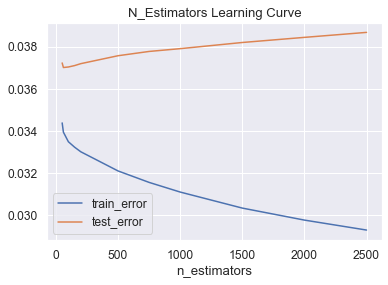

In [2171]:
n_estimators_lr.plot(title="N_Estimators Learning Curve")

In [2160]:
x_val

,Age,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,...,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security
6970,0.725673,0.792903,0.75,0.055556,2,1,5.0,2,3.0,1,...,0,0,0,1,0,0,0,0,0,0
4894,0.762887,0.651706,1.00,0.796296,1,4,5.0,2,5.0,3,...,1,0,0,0,0,0,0,0,0,0
3740,0.725673,0.700859,0.50,0.907407,1,4,5.0,2,3.0,3,...,0,1,0,0,0,0,0,0,0,0
2448,0.093035,0.125589,0.50,0.388889,0,2,6.0,1,3.0,1,...,0,0,0,0,0,0,0,0,0,0
54,0.619175,0.562795,1.00,0.592593,0,2,5.0,1,3.0,3,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,0.111642,0.148600,0.25,0.500000,1,3,7.0,1,3.0,3,...,0,0,0,0,1,0,0,0,0,0
3134,0.334926,0.309676,1.00,0.388889,0,2,9.0,1,1.0,3,...,0,0,0,0,0,0,1,0,0,0
3585,0.327955,0.263654,0.25,0.740741,0,2,5.0,1,1.0,3,...,0,1,0,0,0,0,0,0,0,0
5315,0.297712,0.194622,0.25,0.537037,1,5,7.0,1,2.0,1,...,0,0,0,0,0,1,0,0,0,0


In [2186]:
# Reset results array
results = []

for gamma in [0,0.01,0.05, 0.075,0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9,1,1.5,2]:
    clf = xgb.XGBRegressor(max_depth=2,learning_rate=0.05, n_estimators=100, gamma = gamma, 
                           objective='reg:squarederror')
    clf.fit(x_train, y_train, eval_set=eval_set, verbose=False)
    results.append(
        {
            'gamma': gamma,
            'train_error': metrics.mean_squared_error(y_train, clf.predict(x_train)),
            'test_error': metrics.mean_squared_error(y_val, clf.predict(x_val))
        })
    
gamma_lr = pd.DataFrame(results).set_index('gamma').sort_index()
gamma_lr

,train_error,test_error
gamma,,
0.000,0.034288,0.034130
0.010,0.034288,0.034130
0.050,0.034288,0.034130
0.075,0.034312,0.034117
0.100,0.034609,0.034023
0.200,0.034946,0.033931
0.300,0.034979,0.033925
0.400,0.035007,0.033915
0.600,0.035007,0.033915


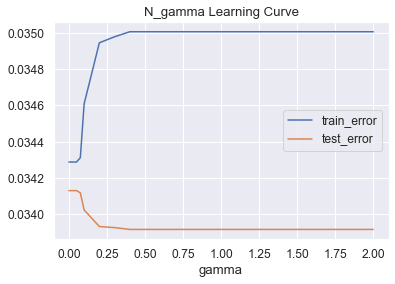

In [2187]:
gamma_lr.plot(title="N_gamma Learning Curve")

In [2196]:
lgb.plot_importance(clf,title='Variable Importance')
plt.show()

TypeError: booster must be Booster or LGBMModel.

In [1895]:
train with regression...age
FOLD:1 SCORE:0.190
FOLD:2 SCORE:0.190
FOLD:3 SCORE:0.179
FOLD:4 SCORE:0.184
FOLD:5 SCORE:0.182
FOLD:6 SCORE:0.190
FOLD:7 SCORE:0.184
FOLD:8 SCORE:0.204
FOLD:9 SCORE:0.181
FOLD:10 SCORE:0.194
FOLD:11 SCORE:0.182
FOLD:12 SCORE:0.172
CV score is 0.18595797171622883
Wall time: 5.28 s

SyntaxError: invalid syntax (<ipython-input-1895-e04017718b5e>, line 1)

In [863]:
FOLD:1 SCORE:0.184
FOLD:2 SCORE:0.192
FOLD:3 SCORE:0.183
FOLD:4 SCORE:0.179
FOLD:5 SCORE:0.190
FOLD:6 SCORE:0.187
FOLD:7 SCORE:0.197
FOLD:8 SCORE:0.187
FOLD:9 SCORE:0.187
FOLD:10 SCORE:0.170
CV score is 0.18549220242059822
Wall time: 4.34 s

SyntaxError: invalid syntax (<ipython-input-863-608ad278e0b0>, line 1)

In [2198]:
preds

[array([0.19042951, 0.19042951, 0.19042951, ..., 0.19042951, 0.19042951,
        0.19042951], dtype=float32),
 array([0.19035035, 0.19035035, 0.19035035, ..., 0.19035035, 0.19035035,
        0.19035035], dtype=float32),
 array([0.19073385, 0.19073385, 0.19073385, ..., 0.19073385, 0.19073385,
        0.19073385], dtype=float32),
 array([0.19115463, 0.19115463, 0.19115463, ..., 0.19115463, 0.19115463,
        0.19115463], dtype=float32),
 array([0.1912626, 0.1912626, 0.1912626, ..., 0.1912626, 0.1912626,
        0.1912626], dtype=float32),
 array([0.20101157, 0.20101157, 0.20101157, ..., 0.20101157, 0.20101157,
        0.20101157], dtype=float32),
 array([0.19070995, 0.19070995, 0.19070995, ..., 0.19070995, 0.19070995,
        0.19070995], dtype=float32),
 array([0.19074288, 0.19074288, 0.19074288, ..., 0.19074288, 0.19074288,
        0.19074288], dtype=float32),
 array([0.19041672, 0.19041672, 0.19041672, ..., 0.19041672, 0.19041672,
        0.19041672], dtype=float32),
 array([0.190494

In [2405]:
prediction = np.mean(preds, axis=0)

prediction 

array([0.19343037, 0.19963566, 0.188083  , ..., 0.18810801, 0.19046406,
       0.19280245])

In [2406]:
prediction = scaler.inverse_transform(pd.DataFrame(prediction))

In [2407]:
prediction

array([[0.19343037],
       [0.19963566],
       [0.188083  ],
       ...,
       [0.18810801],
       [0.19046406],
       [0.19280245]])

In [2408]:
del sub

In [2409]:
sub = pd.DataFrame()

In [2410]:
sub['Employee_ID'] = test_original['Employee_ID']
sub[l_target] = prediction
sub.to_csv('lgb_v0112.csv', index =False)
sub.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.193430
1,EID_9658,0.199636
2,EID_22203,0.188083
3,EID_7652,0.195448
4,EID_6516,0.191160


In [621]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [653]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import log_loss
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [661]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 60, num =10)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4, 5,6,7,8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3,4,5,6,7,8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 11, 17, 23, 29, 35, 41, 47, 53, 60],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
 'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}


In [662]:
rf = RandomForestClassifier()
# search across 5 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 15,  random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [663]:
rf_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 29,
 'bootstrap': False}

In [664]:
pred_y = rf_random.predict(x_val)

In [665]:
accuracy_score(y_val, pred_y)

0.9192857142857143

In [666]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [25,30,35],
    #'max_features': ['sqrt'],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [2 , 3],
    'n_estimators': [25,30,35]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,  n_jobs = -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [667]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 25}

In [668]:
pred_y = grid_search.predict(x_val)

In [669]:
accuracy_score(y_val, pred_y)

0.9192857142857143

In [705]:
x_train

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
140,59.000000,4,34.0,2,53,1,2,7.0,2,2.0,...,0,0,0,0,0,0,0,1,0,0
2875,47.000000,3,17.0,4,42,1,5,10.0,2,4.0,...,0,0,0,0,0,0,0,0,0,1
4707,31.000000,5,6.0,2,72,0,1,5.0,1,1.0,...,0,0,0,0,1,0,1,0,0,0
3172,35.000000,2,12.0,3,70,1,1,6.0,1,3.0,...,0,0,0,0,0,0,1,0,0,0
2269,26.000000,3,4.0,4,40,1,2,6.0,1,1.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6370,35.000000,3,7.0,4,50,0,5,8.0,2,4.0,...,0,0,0,0,0,0,0,1,0,0
4725,51.000000,4,12.0,1,71,2,4,2.0,1,4.0,...,0,1,0,0,0,0,0,0,1,0
6176,30.000000,4,6.0,3,68,1,5,6.0,1,4.0,...,0,0,0,0,0,0,0,0,0,1
2214,39.622799,4,5.0,3,68,2,3,4.0,1,2.0,...,0,0,0,0,0,0,0,0,0,1


In [682]:
y_train

140     0
2875    0
4707    0
3172    0
2269    0
       ..
6370    0
4725    0
6176    0
2214    0
4677    0
Name: Attrition_rate, Length: 5600, dtype: int32

In [736]:
rf = RandomForestClassifier(random_state = 42)

In [737]:
#rf.fit(x_train, y_train)

rf.fit(X_over, y_over)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [738]:
pred_y = rf.predict(x_val)

In [739]:
accuracy_score(y_val, pred_y)

0.9857142857142858

In [740]:
del sub

In [741]:
sub = pd.DataFrame()

In [742]:
sub['Employee_ID'] = test_original['Employee_ID']

In [743]:
predictions = rf.predict_proba(X_test)

In [744]:
predictions = pd.DataFrame(predictions)

In [745]:
sub['Attrition_rate'] = predictions[1]

In [746]:
sub.to_csv('sub_rf3.csv', index =False)

In [719]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = BalancedRandomForestClassifier(n_estimators=10)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1 )
#scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1 )
# summarize performance
#print('Mean ROC AUC: %.3f' % mean(scores))
print('Accuracy: %.3f%%' % (mean(scores) * 100))

Accuracy: 92.713%


In [698]:
model

BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                               criterion='gini', max_depth=None,
                               max_features='auto', max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=10,
                               n_jobs=1, oob_score=False, random_state=None,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

In [684]:
del sub
sub = pd.DataFrame()
sub['Employee_ID'] = test_original['Employee_ID']

In [690]:
predictions = model.predict(X_test)

NotFittedError: This BalancedRandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
predictions = pd.DataFrame(predictions)

In [ ]:
sub['Attrition_rate'] = predictions[1]

In [ ]:
sub.to_csv('sub_rf2.csv', index =False)

In [287]:
err = []
y_pred_tot_lgm = []

from sklearn.model_selection import KFold

fold = KFold(n_splits=6, shuffle=True, random_state=2020)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = LGBMRegressor(boosting_type='gbdt',
                       max_depth=10,
                       learning_rate=0.1,
                       n_estimators=20000,
                     #  min_child_weight=0.01,
                     #  colsample_bytree=0.5,
                    #    feature_fraction= 0.9,
                     #   bagging_fraction=.85,
                     #   lambda_l1= 0.1,
                     #   lambda_l2= .1,
                      # class_weight='balanced',
                       num_leaves=10,
                       random_state=1994)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=500,
          eval_metric='rmse',
          verbose=200)
    pred_y = m.predict(x_val)
  #  print("err_lgm: ",log_loss(y_val,pred_y))
 #   err.append(log_loss(y_val, pred_y))
    pred_test = m.predict(X_test)
    i = i + 1
    y_pred_tot_lgm.append(pred_test)

Training until validation scores don't improve for 500 rounds.
[200]	training's rmse: 0.159134	valid_1's rmse: 0.199942
[400]	training's rmse: 0.142089	valid_1's rmse: 0.202207
Early stopping, best iteration is:
[1]	training's rmse: 0.183247	valid_1's rmse: 0.197016
Training until validation scores don't improve for 500 rounds.
[200]	training's rmse: 0.162383	valid_1's rmse: 0.184589
[400]	training's rmse: 0.145668	valid_1's rmse: 0.187579
Early stopping, best iteration is:
[2]	training's rmse: 0.186288	valid_1's rmse: 0.180407
Training until validation scores don't improve for 500 rounds.
[200]	training's rmse: 0.161874	valid_1's rmse: 0.187434
[400]	training's rmse: 0.144159	valid_1's rmse: 0.189831
Early stopping, best iteration is:
[1]	training's rmse: 0.186122	valid_1's rmse: 0.1829
Training until validation scores don't improve for 500 rounds.
[200]	training's rmse: 0.164184	valid_1's rmse: 0.173521
[400]	training's rmse: 0.14626	valid_1's rmse: 0.176792
Early stopping, best iter

In [262]:
y_train

6322    0.2476
4833    0.3578
2859    0.2256
6649    0.2828
1886    0.1822
         ...  
4153    0.0418
5302    0.1042
2364    0.2464
6581    0.2869
320     0.2283
Name: Attrition_rate, Length: 5600, dtype: float64

In [260]:
x_train

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,...,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive
6322,27.0,4,3.0,2,55,2,3,9.0,2,3.0,...,0,0,0,0,0,0,0,0,0,1
4833,22.0,5,3.0,1,48,0,2,5.0,2,4.0,...,0,0,0,0,0,0,0,0,1,0
2859,60.0,4,36.0,2,74,1,4,9.0,2,1.0,...,0,0,0,0,0,0,1,0,0,0
6649,47.0,2,25.0,2,51,2,5,10.0,1,1.0,...,0,0,0,0,1,0,0,0,1,0
1886,27.0,2,5.0,2,55,2,4,5.0,2,2.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,53.0,3,21.0,3,21,1,3,6.0,2,3.0,...,0,0,0,0,1,0,0,1,0,0
5302,65.0,3,41.0,1,23,0,3,3.0,2,3.0,...,0,0,0,0,0,0,0,0,0,1
2364,33.0,4,10.0,4,25,1,3,7.0,1,2.0,...,0,0,0,0,0,0,1,0,0,0
6581,42.0,2,8.0,3,62,0,1,5.0,2,4.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
def scoring(y_true, y_pred):
    from sklearn.metrics import mean_squared_error, mean_squared_log_error
    return 100*max()
    #return  np.sqrt(np.mean(np.power(np.log(y_pred) - np.log(y_true), 2)))
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [282]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(boosting_type='gbdt',
                       max_depth=10,
                       learning_rate=0.01,
                       n_estimators=15000,
                       min_child_weight=0.01,
                       colsample_bytree=0.5,
                    #   scale_pos_weight = 91,
                      # class_weight='balanced',
                       num_leaves=10,
                       random_state=1994)
model.fit(x_train,y_train,
          eval_set=[(x_train,y_train),(x_val, y_val.values)],
#model.fit(X_over,y_over,
 #         eval_set=[(X_over,y_over),(x_val, y_val.values)],          
         eval_metric='rmse',
         # eval_metric='binary_logloss',
          early_stopping_rounds=150,
          verbose=-1)

pred_y = model.predict(x_val)

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[2]	training's rmse: 0.186185	valid_1's rmse: 0.183782


In [801]:
over

Training until validation scores don't improve for 300 rounds.
Early stopping, best iteration is:
[3434]	training's binary_logloss: 0.0211769	valid_1's binary_logloss: 0.120101

SyntaxError: invalid syntax (<ipython-input-801-86b311f8dcac>, line 3)

In [ ]:
smote

Training until validation scores don't improve for 300 rounds.
Early stopping, best iteration is:
[2736]	training's binary_logloss: 0.0119784	valid_1's binary_logloss: 0.115466

In [ ]:
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.261265	valid_1's binary_logloss: 0.2726

In [265]:
pred_y

array([0.18983381, 0.19023489, 0.19008413, ..., 0.19008413, 0.18985258,
       0.18983287])

In [266]:
y_val

5933    0.5681
670     0.1114
3964    0.0085
1660    0.2672
2722    0.1050
         ...  
3608    0.1092
788     0.1033
4393    0.0237
5652    0.5073
6129    0.4683
Name: Attrition_rate, Length: 1400, dtype: float64

In [267]:
from sklearn.metrics import log_loss
log_loss(y_val, pred_y)

ValueError: Unknown label type: (5933    0.5681
670     0.1114
3964    0.0085
1660    0.2672
2722    0.1050
         ...  
3608    0.1092
788     0.1033
4393    0.0237
5652    0.5073
6129    0.4683
Name: Attrition_rate, Length: 1400, dtype: float64,)

In [268]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val,  pred_y)

ValueError: continuous is not supported

<strong>We got 96% which is very good </strong>

In [269]:
predictions = model.predict_proba(X_test)

AttributeError: 'LGBMRegressor' object has no attribute 'predict_proba'

In [270]:
predictions.shape

(3000, 2)

In [271]:
roc_auc_score(test_fe[l_target],  model.predict(X_test))

KeyError: 'Attrition_rate'

In [272]:
pd.DataFrame(predictions)

,0,1
0,0.882882,0.117118
1,0.906198,0.093802
2,0.886357,0.113643
3,0.860503,0.139497
4,0.865068,0.134932
...,...,...
2995,0.923058,0.076942
2996,0.920675,0.079325
2997,0.932468,0.067532
2998,0.873205,0.126795


In [273]:
del sub

In [274]:
sub = pd.DataFrame()

In [275]:
sub['Employee_ID'] = test_original['Employee_ID']

In [276]:
sub

,Employee_ID
0,EID_22713
1,EID_9658
2,EID_22203
3,EID_7652
4,EID_6516
...,...
2995,EID_22547
2996,EID_10066
2997,EID_7126
2998,EID_4929


In [277]:
predictions = pd.DataFrame(predictions)

In [278]:
predictions

,0,1
0,0.882882,0.117118
1,0.906198,0.093802
2,0.886357,0.113643
3,0.860503,0.139497
4,0.865068,0.134932
...,...,...
2995,0.923058,0.076942
2996,0.920675,0.079325
2997,0.932468,0.067532
2998,0.873205,0.126795


In [151]:
sub['Attrition_rate'] = predictions[1]

In [152]:
sub

,Employee_ID,Attrition_rate
0,EID_22713,0.117118
1,EID_9658,0.093802
2,EID_22203,0.113643
3,EID_7652,0.139497
4,EID_6516,0.134932
...,...,...
2995,EID_22547,0.076942
2996,EID_10066,0.079325
2997,EID_7126,0.067532
2998,EID_4929,0.126795


In [883]:
sub.to_csv('sub_lgbm3x.csv', index =False)

In [809]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import train_test_split

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [814]:
# For convenience we will use sklearn's GBM, the situation will be similar with XGBoost and others
clf = GradientBoostingClassifier(n_estimators=10000, learning_rate=0.01, max_depth=10, random_state=0)
clf.fit(x_train, y_train)

y_pred = clf.predict_proba(x_val)[:, 1]
print("Test logloss: {}".format(log_loss(y_val, y_pred)))

Test logloss: 0.6696230117260514


In [817]:

def compute_loss(y_true, scores_pred):
    '''
        Since we use raw scores we will wrap log_loss 
        and apply sigmoid to our predictions before computing log_loss itself
    '''
    return log_loss(y_true, sigmoid(scores_pred))
    

'''
    Get cummulative sum of *decision function* for trees. i-th element is a sum of trees 0...i-1.
    We cannot use staged_predict_proba, since we want to maniputate raw scores
    (not probabilities). And only in the end convert the scores to probabilities using sigmoid
'''
cum_preds = np.array([x for x in clf.staged_decision_function(x_val)])[:, :, 0] 

print ("Logloss using all trees:           {}".format(compute_loss(y_val, cum_preds[-1, :])))
print ("Logloss using all trees but last:  {}".format(compute_loss(y_val, cum_preds[-2, :])))
print ("Logloss using all trees but first: {}".format(compute_loss(y_val, cum_preds[-1, :] - cum_preds[0, :])))

Logloss using all trees:           0.6696230117260514
Logloss using all trees but last:  0.6696230117260514
Logloss using all trees but first: 0.5085660072369699


In [831]:
x_train.shape, y_train.shape

((5600, 42), (5600,))

In [851]:
x_train1 = X_over

In [852]:
y_train1=y_over

In [865]:
#Step 1: first fit a Random Forest to the data. Set n_estimators to a high value.


rf = RandomForestClassifier(n_estimators=200, max_depth=10, n_jobs=-1)
rf.fit(x_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [866]:
#Step 2: Get predictions for each tree in Random Forest separately.

predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(x_val)[None, :])

In [867]:
#Step 3: Concatenate the predictions to a tensor of size (number of trees, number of objects, number of classes).

predictions = np.vstack(predictions)

In [868]:
#Step 4: Сompute cumulative average of the predictions. That will be a tensor, that will contain predictions of the random forests for each n_estimators.

cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]

In [869]:
#Step 5: Get accuracy scores for each n_estimators value

scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_val, np.argmax(pred, axis=1)))

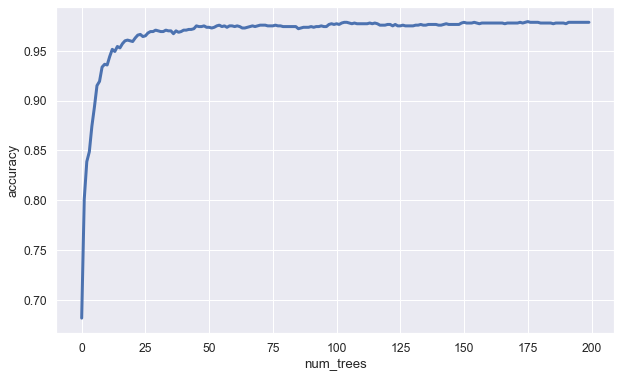

In [870]:
#That is it! Plot the resulting scores to obtain similar plot to one that appeared on the slides.

plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy');

In [871]:
predictions = rf.predict_proba(X_test)